# contrastplots of X9.3 line Ha, CaK and Ca8452

In [1]:
import sys
sys.path.append('D:/solar flares/data/2017-09-06')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import use_nessi as un
import use_nessi2 as un2
import os
from importlib import reload
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
from scipy.interpolate import interp1d


# %matplotlib inline
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
# import use_nessi as un
# import matplotlib.animation as animation
# from PIL import Image
# import datetime as dt
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection

# import sys
# # sys.path.append('D:/solar flares/data/2017-09-06')
# import use_nessi as un
# print('sys.path:', sys.path)


reload(un2)

<module 'use_nessi2' from 'D:\\solar flares/data/2017-09-06\\use_nessi2.py'>

In [3]:
sr = solar_radius = 959.63
area_factor = 60**2/np.pi/sr**2

Ca $II 8542 \AA$

In [4]:
reload(un)
lines = ["Ha17", "CaK17", "CaII17"]
long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}


data = un.load_for_further_analysis(lines, full_path=un.full_path("17"))
un2.disgard_cont_point("CaK17", data)
data.keys()

dict_keys(['FOV_Ha17', 'quiet_sun_Ha17', 'nessi_Ha17', 'TIME_Ha17', 'FOV_CaK17', 'quiet_sun_CaK17', 'nessi_CaK17', 'TIME_CaK17', 'FOV_CaII17', 'quiet_sun_CaII17', 'nessi_CaII17', 'TIME_CaII17'])

In [5]:
data['quiet_sun_CaK17']

array([[3.93266300e+03, 3.93281300e+03, 3.93301300e+03, 3.93311300e+03,
        3.93321300e+03, 3.93331300e+03, 3.93341300e+03, 3.93351300e+03,
        3.93359300e+03, 3.93366300e+03, 3.93373300e+03, 3.93381300e+03,
        3.93391300e+03, 3.93401300e+03, 3.93411300e+03, 3.93421300e+03,
        3.93431300e+03, 3.93451300e+03, 3.93466300e+03],
       [2.69620859e-09, 2.60297139e-09, 2.41901676e-09, 2.39771425e-09,
        2.49635712e-09, 2.88763635e-09, 3.73523035e-09, 4.57235538e-09,
        4.43872983e-09, 4.18783674e-09, 4.09090717e-09, 3.98979871e-09,
        3.48182616e-09, 2.88419888e-09, 2.51703747e-09, 2.34405362e-09,
        2.30429942e-09, 2.52616728e-09, 2.80701751e-09],
       [1.30997121e-01, 1.30475819e-01, 1.37365907e-01, 1.51536182e-01,
        1.93220943e-01, 2.91723043e-01, 4.39297378e-01, 5.14238536e-01,
        5.01057744e-01, 5.12298167e-01, 5.24119794e-01, 5.11735320e-01,
        5.00380278e-01, 3.97847265e-01, 3.14652920e-01, 2.34681651e-01,
        1.93083018e-01

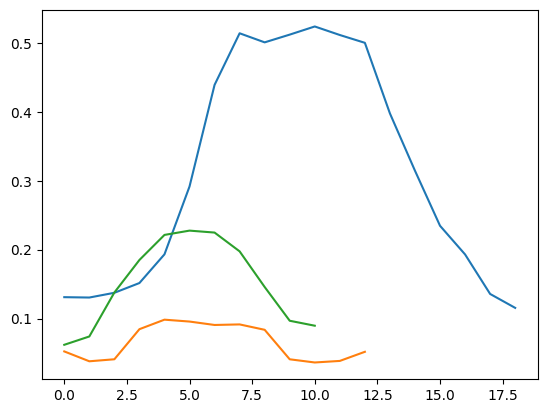

In [6]:
plt.plot(data['quiet_sun_CaK17'][2])
plt.plot(data['quiet_sun_Ha17'][2])
plt.plot(data['quiet_sun_CaII17'][2])

In [7]:
# sr = solar_radius = 959.63
# area_factor = 60**2/np.pi/sr**2

# def contrast_FOV_data(name_of_line, quiet_sun_subtraction=True):
#     FOV = data["FOV_"+name_of_line]
#     wav_qs, qs_spec = data["quiet_sun_"+name_of_line]
#     time = data["TIME_"+name_of_line]
#     wav_nessi, dc_nessi, clv_nessi = data["nessi_"+name_of_line]
    
#     if quiet_sun_subtraction:
#         qs_spectc =  qs_spec
#         wav_qsc = wav_qs
#     else:
#         qs_spectc = dc_nessi * clv_nessi
#         wav_qsc = wav_nessi
                
#     wav = smooth_wavelengths(wav_qs, wav_nessi, num=100)
        
#     DFOV = np.array([interp1d(wav_qs, FOV[i,:])(wav)  for i in range(np.shape(FOV)[0])]) - interp1d(wav_qsc, qs_spectc)(wav)
    
#     line = interp1d(wav_qsc, qs_spectc)(wav)

#     return wav, DFOV , time, line

# def smooth_wavelengths(wav1, wav2, num=100):
#     start = max(np.min(wav1), np.min(wav2))
#     stop  = min(np.max(wav1), np.max(wav2))
    
#     wav_smooth = np.linspace(start, stop, num)
    
#     return wav_smooth
    

# def contrast_FD_data(name_of_line, quiet_sun_subtraction=True, area_factor=60**2/np.pi/959.63**2,):
#     wav, DFOV, time, line = contrast_FOV_data(name_of_line, quiet_sun_subtraction)
    
#     wav_nessi, dc_nessi, clv_nessi = data["nessi_"+name_of_line]

#     line = interp1d(wav_nessi, dc_nessi)(wav)
#     DFD = area_factor * DFOV 
    
#     return wav, DFD, time, line
    

# def get_Harps(name_of_line):
#     folder = "Harps/"
#     flare =  np.load(folder+'Flux_corrected.npy') # shape (131, 293401)

#     wav = np.load(folder+'Wavelength.npy')

#     timeavg = np.median(flare[10:30], axis=0)

#     flarerange = (flare[31:63] / timeavg) - 1 
#     cadence =  5 # Harps cadence in minutes
#     time = np.arange(np.shape(flarerange)[0])  * cadence

#     line = 6563

#     if 'Ha' in name_of_line : 
#         #Pick out window
#         linecore = 6562.8
#         flare_win = flarerange[:,265800:266800]
#         wav_win = wav[265800:266800]
        
#     elif 'CaK' in name_of_line : #Cak
#         #Pick out window
#         linecore = 3933.66
#         flare_win = flarerange[:,2870:3870]
#         wav_win = wav[2870:3870]
        
#     elif 'CaH' in name_of_line : #CaH
#         #Pick out window
#         linecore = 3968.47
#         flare_win = flarerange[:,6300:7300]
#         wav_win = wav[6300:7300]
#     else:
#         print(f"Line could not be detirmend. only Ha, CaK and CaH possible. Got {name_of_line}.")
#         return None, None, None
    
#     return smooth(flare_win), wav_win, time

# from scipy.signal import convolve2d
# def smooth(data, n_wav=50, n_time=2, mode='same'):
#     """
#     Smooths a NumPy array by averaging over n neighbors.

#     Args:
#         data: A NumPy array of any shape.
#         n: The number of neighbors to average over.

#     Returns:
#         A new NumPy array with the same shape as the input data,
#         containing the smoothed values.
#     """
#     kernel = np.ones((n_time, n_wav))
#     return convolve2d(data, kernel, mode=mode)

In [8]:
# def ax_contrastplot(fig, ax, X, Y, Z, x, line, decorations={}, seperate_colorbar=True, lim=0.001, logscale=False):
#     if seperate_colorbar:
#         # print('X', X, 'Y', Y, 'Z', Z)
#         pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r',vmin=-np.max(Z),  shading='auto')
#         fig.colorbar(pcm, ax=ax, extend='both')
#     else:
#         if logscale:
#             pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', 
#                             norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
#                                               vmin=-lim, vmax=lim, base=10),
#                                                 shading='auto')
#         else:
#             pcm = ax.pcolormesh(X, Y, Z, cmap='RdBu_r', vmin=-lim, vmax=lim, shading='auto')


#     if 'title' in decorations:
#         ax.set_title(decorations['title'])
#     if "ylabel" in decorations:
#         ax.set_ylabel(decorations['ylabel'])    
#     if "xlabel" in decorations:
#         ax.set_ylabel(decorations['xlabel'])

#     ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

#     if 'color' in decorations:
#         color=decorations['color']
#     else:
#         color = 'black'
#     # ax2.set_ylabel('Intensity []', color=color)  # we already handled the x-label with ax1
#     ax2.plot(x,line, color=color)
#     ax2.tick_params(axis='y', labelcolor=color)
#     return pcm

# def Create_flare_contrast_plots(names_of_lines_list, quiet_sun_subtraction_list, Harps=False, 
#                                 scale_up=False, title='Contrast profiles', start_of_flare='', shared_colors_row=False):
    
#     rows = 2 + Harps + scale_up
#     cols = len(names_of_lines_list)
    
#     # make figure
#     fig, ax = plt.subplots(rows, cols, figsize=(5*cols,4*rows), constrained_layout=True) 
#     fig.suptitle(title, fontsize=20)
#     fig.supylabel(f"Minutes from start of flare {start_of_flare}")
#     fig.supxlabel(r"Wavelength [$\AA$]")
    
#     # row 1: sst FOV contrastplots
#     for i, name in enumerate(names_of_lines_list):
#         print("FOV: Line", name)
#         wav, DFOV , time, line = contrast_FOV_data(name, quiet_sun_subtraction_list[i])
#         W, T = np.meshgrid(wav, time)
        
#         decorations={"title":long_names[name]}
#         if i==0:
#             decorations["ylabel"] = "FOV contrast profile"
        
#         ax_contrastplot(fig, ax[0, i], W, T, DFOV, wav, line, decorations , seperate_colorbar=True, lim=0.001, logscale=False)

#     # row 2: nessi + FOV = Full disk contrastplots
#     for i, name in enumerate(names_of_lines_list):
#         print("FD: Line", name)
#         wav, DFD , time, line = contrast_FD_data(name, quiet_sun_subtraction_list[i])
#         W, T = np.meshgrid(wav, time)
        
#         decorations={}
#         if i==0:
#             decorations["ylabel"] = "Full disk (Nessi + flare) contrast profile"
            
#         ax_contrastplot(fig, ax[1, i], W, T, DFD, wav, line, decorations, seperate_colorbar=True, lim=0.001, logscale=False)

#     # row 3: scaled up flare
#     if scale_up:
#         for i, name in enumerate(names_of_lines_list):
#             print("scaled flare: Line", name)
#             wav, DFD , time, line = contrast_FD_data(name, quiet_sun_subtraction_list[i], area_factor=area_factor*10)
#             W, T = np.meshgrid(wav, time)
            
#             decorations={}
#             if i==0:
#                 decorations["ylabel"] = "10x Scaled flare profile (Nessi + 10 x flare)"
                
#             ax_contrastplot(fig, ax[2, i], W, T, DFD, wav, line, decorations, seperate_colorbar=True, lim=0.001, logscale=False)
        
        
#     # row 4: Harps data 
#     if Harps:
#         ax[3,0].set_ylabel("Harps contrast profile")
#         for i, name in enumerate(names_of_lines_list):
#             print("Harps: Line", name)
#             flare_win, wav_win, time = get_Harps(name)
#             if flare_win is not None:
#                 wav_nessi, dc_nessi, clv_nessi = data["nessi_"+name]
#                 if "CaK" in name:
#                     wav_nessi, dc_nessi = wav_nessi[:-1], dc_nessi[:-1]
#                 W, T = np.meshgrid(wav_win, time)
                
#                 decorations={}
#                 if i==0:
#                     decorations["ylabel"] = "Harps contrast profile"
#                 ax_contrastplot(fig, ax[3, i], W, T, flare_win, wav_nessi, dc_nessi, decorations , seperate_colorbar=True, lim=0.001, logscale=False)
    
    
    
#     # # Place labels outside the plot area using figtext
#     # fig.text(0.1, 0.95, "Row 1", ha="left", va="center", fontsize=12, fontweight="bold")  # Adjust positions and formatting
#     # fig.text(0.1, 0.55, "Row 2", ha="left", va="center", fontsize=12, fontweight="bold")
    
        
#     # # Create annotations positioned outside the axes
#     # row1_label = fig.text(0.05, 0.95, "Row 1a", ha="left", va="center", fontsize=12, fontweight="bold")
#     # row2_label = fig.text(0.05, 0.55, "Row 2a", ha="left", va="center", fontsize=12, fontweight="bold")

#     # # Adjust zorder to ensure labels are displayed on top
#     # row1_label.set_zorder(20)
#     # row2_label.set_zorder(20)
        



FOV: Line CaII17
FOV: Line Ha17
FOV: Line CaK17
FD: Line CaII17 None
FD: Line Ha17 None
FD: Line CaK17 None
scaled flare: Line CaII17 None
scaled flare: Line Ha17 None
scaled flare: Line CaK17 None
Line could not be detirmend. only Ha, CaK and CaH possible. Got CaII17.
Harps: Line Ha17 None
Harps: Line CaK17 None


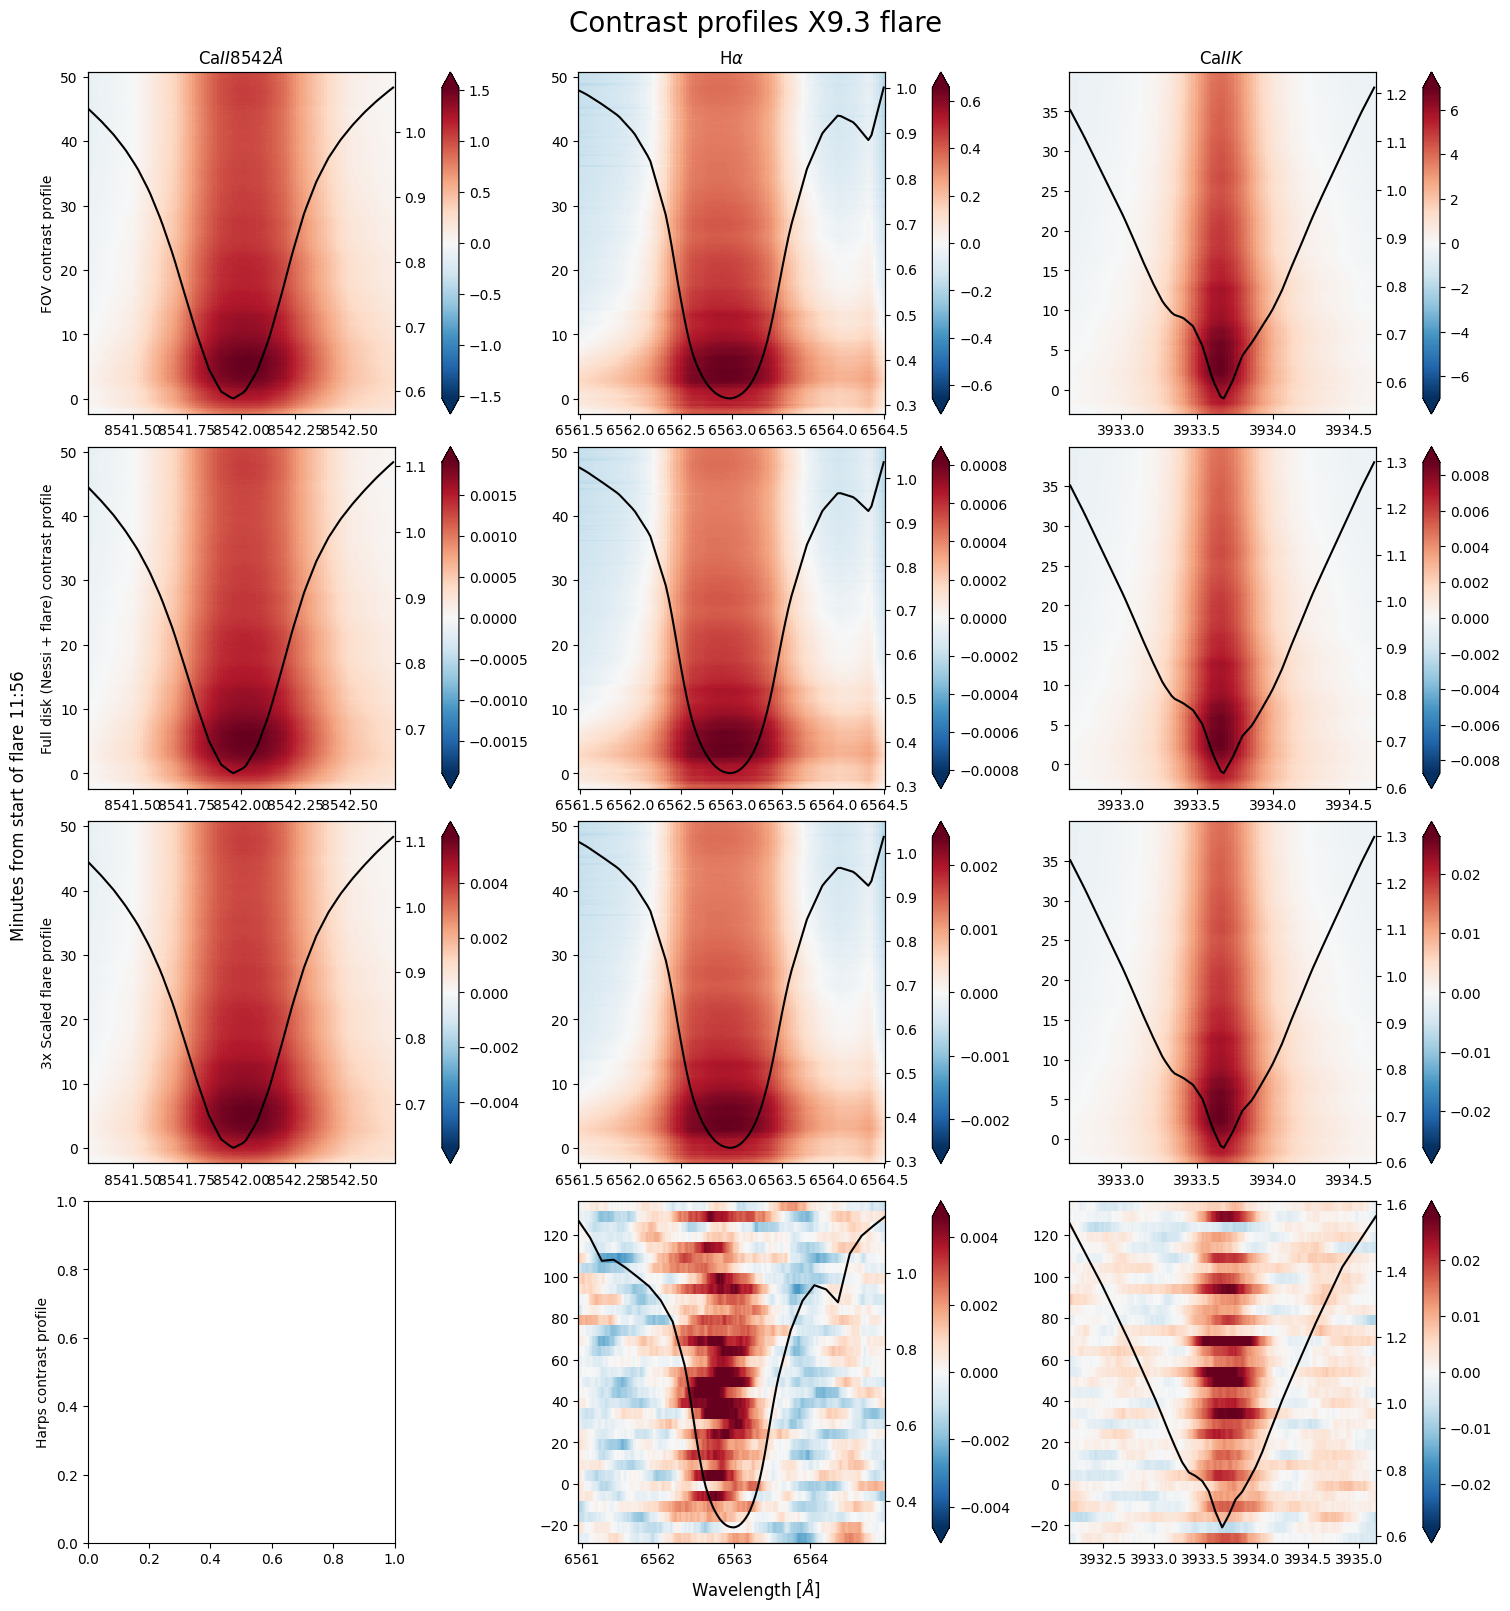

In [11]:
reload(un2)
lines = ["CaII17", "Ha17", "CaK17"]
qs_sub = [False, False, False]

long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}
# vlims = {"Ha17":0.006, "CaK17":0.04, "CaII17":0.01}


un2.Create_flare_contrast_plots(lines, data, qs_sub, long_names, Harps=True, scale_up=True, 
                            title='Contrast profiles X9.3 flare', start_of_flare="11:56", add_noise=True, scale=3)

In [12]:

# def get_Harps(name_of_line):
#     folder = "Harps/"
#     flare =  np.load(folder+'Flux_corrected.npy') # shape (131, 293401)

#     wav = np.load(folder+'Wavelength.npy')

#     timeavg = np.median(flare[10:30], axis=0)

#     flarerange = (flare[:63] / timeavg) - 1 
#     cadence =  5 # Harps cadence in minutes
#     time = np.arange(np.shape(flarerange)[0]) * cadence

#     line = 6563

#     if 'Ha' in name_of_line : 
#         #Pick out window
#         linecore = 6562.8
#         flare_win = flarerange[:,265800:266800]
#         wav_win = wav[265800:266800]
        
#     elif 'CaK' in name_of_line : #Cak
#         #Pick out window
#         linecore = 3933.66
#         flare_win = flarerange[:,2870:3870]
#         wav_win = wav[2870:3870]
        
#     elif 'CaH' in name_of_line : #CaH
#         #Pick out window
#         linecore = 3968.47
#         flare_win = flarerange[:,6300:7300]
#         wav_win = wav[6300:7300]
#     else:
#         print(f"Line could not be detirmend. only Ha, CaK and CaH possible. Got {name_of_line}.")
#         return None, None, None
    
#     return flare_win, wav_win, time

In [13]:


# def Harps_contrast_plots(names_of_lines_list, quiet_sun_subtraction_list, Harps=False, 
#                                 scale_up=False, title='Contrast profiles Harps', start_of_flare='', shared_colors_row=False):
    
#     rows = 1
#     cols = len(names_of_lines_list)
    
#     # make figure
#     fig, ax = plt.subplots(rows, cols, figsize=(5*cols,4*rows), constrained_layout=True) 
#     fig.suptitle(title, fontsize=20)
#     fig.supylabel(f"Minutes from start of flare {start_of_flare}")
#     fig.supxlabel(r"Wavelength [$\AA$]")
    
#     # row 1: sst Harps contrastplots
#     if Harps:
#         for i, name in enumerate(names_of_lines_list):
#             print("Harps: Line", name)
#             flare_win, wav_win, time = get_Harps(name)
#             if flare_win is not None:
#                 wav_nessi, dc_nessi, clv_nessi = data["nessi_"+name]
#                 if "CaK" in name:
#                     wav_nessi, dc_nessi = wav_nessi[:-1], dc_nessi[:-1]
#                 W, T = np.meshgrid(wav_win, time)
                
#                 decorations={"title":long_names[name]}
#                 if i==0:
#                     decorations["ylabel"] = "Harps contrast profile"
                
#                 ax_contrastplot(fig, ax[i], W, T, flare_win, wav_nessi, dc_nessi, decorations , seperate_colorbar=True, lim=0.001, logscale=False)

In [4]:
def get_harps_std(name):
    harps = un2.get_Harps(name)
    wingl = harps[0][:, :200]
    wingr = harps[0][:, 800:]
    # center = harps[0][:, 400:600]
    stdl = np.std(wingl) 
    stdr = np.std(wingr) 
    # stdc = np.std(center) 
    # print(f'{stdl=},{ stdr=},{ stdc=}')
    # ml = np.mean(wingl)
    # mr = np.mean(wingr)
    # mc = np.mean(center)
    # print(f'{ml=},{ mr=},{ mc=}')
    return np.mean([stdl, stdr])

def noise_alike_harps(name, shape):
    std = get_harps_std(name)
    noise = np.random.normal(loc=0, scale=std, size=shape)
    return noise

name = 'Ha'
harp = un2.get_Harps(name)
get_harps_std(name)
print(np.shape(harp[0]))
harp

(33, 1000)


(array([[ 1.22027628e-03,  1.08103868e-03,  9.49018187e-04, ...,
         -5.94211449e-04, -6.06540494e-04, -6.18535985e-04],
        [ 1.70405227e-03,  1.60389377e-03,  1.50716105e-03, ...,
          2.24611147e-03,  2.38810732e-03,  2.53545939e-03],
        [-4.48185215e-04, -3.46355489e-04, -2.49625773e-04, ...,
         -1.06136509e-05, -1.10188808e-05, -1.24456172e-05],
        ...,
        [ 4.42522230e-03,  3.94753137e-03,  3.49212846e-03, ...,
          6.56798499e-04,  5.62912809e-04,  4.60377018e-04],
        [ 1.78762935e-04,  2.07118482e-04,  2.32584906e-04, ...,
          1.03618801e-03,  1.07534210e-03,  1.11558630e-03],
        [ 4.13713148e-03,  3.79573342e-03,  3.46678147e-03, ...,
          1.41855918e-03,  1.50899618e-03,  1.60251394e-03]]),
 array([6558.003 , 6558.0127, 6558.023 , 6558.0327, 6558.043 , 6558.0527,
        6558.063 , 6558.0728, 6558.083 , 6558.093 , 6558.103 , 6558.113 ,
        6558.123 , 6558.133 , 6558.143 , 6558.153 , 6558.163 , 6558.173 ,
       

In [15]:
data

{'FOV_Ha17': array([[1.        , 0.98911603, 0.98488782, ..., 0.97215287, 1.01730338,
         1.01247768],
        [1.00079728, 0.98951819, 0.97528021, ..., 0.97209999, 1.02315931,
         1.02233244],
        [1.01012666, 1.00347793, 0.98701515, ..., 0.98622749, 1.03341276,
         1.02998458],
        ...,
        [0.83856666, 0.81269827, 0.80899723, ..., 0.79600573, 0.81387384,
         0.82689741],
        [0.83895229, 0.81215772, 0.80985333, ..., 0.7933725 , 0.81445323,
         0.82892991],
        [0.83720461, 0.81341532, 0.80794449, ..., 0.79077479, 0.81274267,
         0.82950917]]),
 'quiet_sun_Ha17': array([[6.56150000e+03, 6.56200000e+03, 6.56220000e+03, 6.56240000e+03,
         6.56270000e+03, 6.56285000e+03, 6.56300000e+03, 6.56315000e+03,
         6.56330000e+03, 6.56360000e+03, 6.56380000e+03, 6.56400000e+03,
         6.56450000e+03],
        [2.76978401e-08, 2.52960703e-08, 2.27472038e-08, 1.71177930e-08,
         9.99433646e-09, 9.32648929e-09, 9.15971860e-09, 9.58

Harps: Line CaII17
Line could not be detirmend. only Ha, CaK and CaH possible. Got CaII17.
Harps: Line Ha17
Harps: Line CaK17


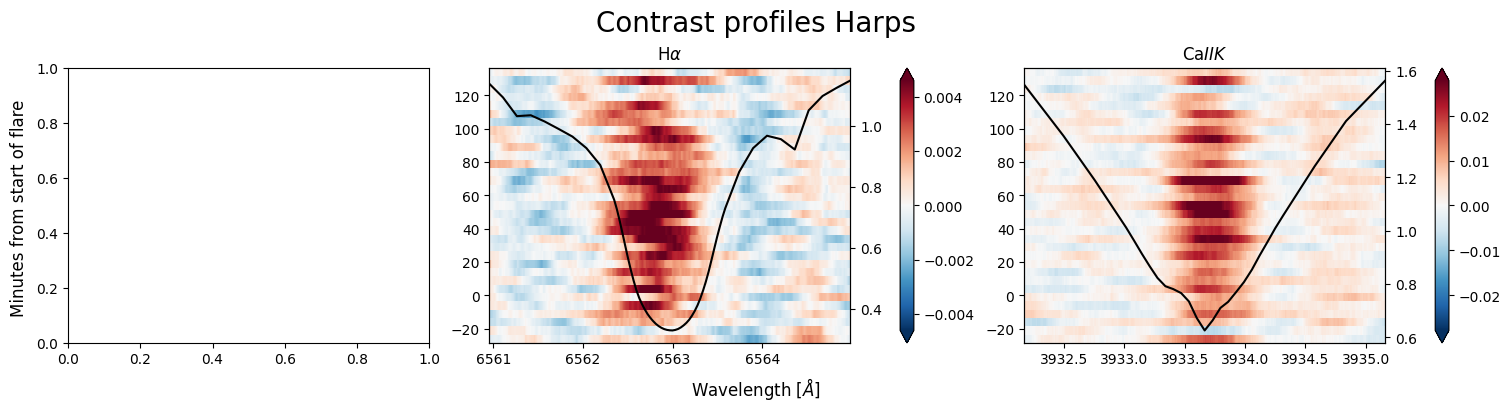

In [16]:
reload(un2)
lines = ["CaII17", "Ha17", "CaK17"]
qs_sub = [False, False, False]
long_names = {"CaII17":r'Ca$II 8542 \AA$', "Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$'}

un2.Harps_contrast_plots(lines, data, qs_sub, long_names, Harps=True, 
                                scale_up=False, title='Contrast profiles Harps', start_of_flare='', shared_colors_row=False)

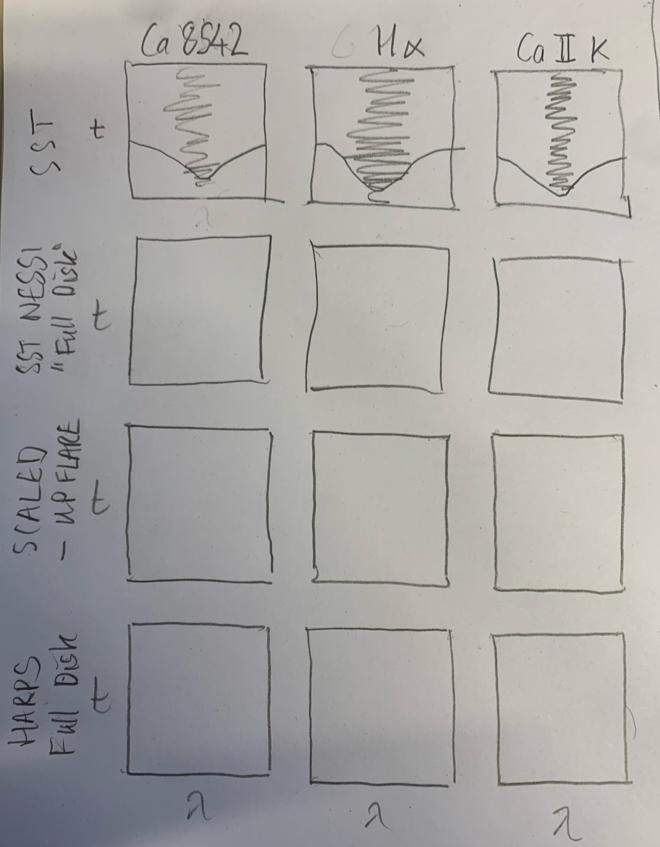
# X2.2 flare at 9 o'clock



In [19]:
lines = ["Ha17_9u"]
long_names = {"Ha17_9u":r"H$\alpha$"}

data = un.load_for_further_analysis(lines, full_path=un.full_path("17"))
data.keys()

dict_keys(['FOV_Ha17_9u', 'quiet_sun_Ha17_9u', 'nessi_Ha17_9u', 'TIME_Ha17_9u'])

FOV: Line Ha17_9u
FD: Line Ha17_9u None
scaled flare: Line Ha17_9u None
Harps: Line Ha17_9u None


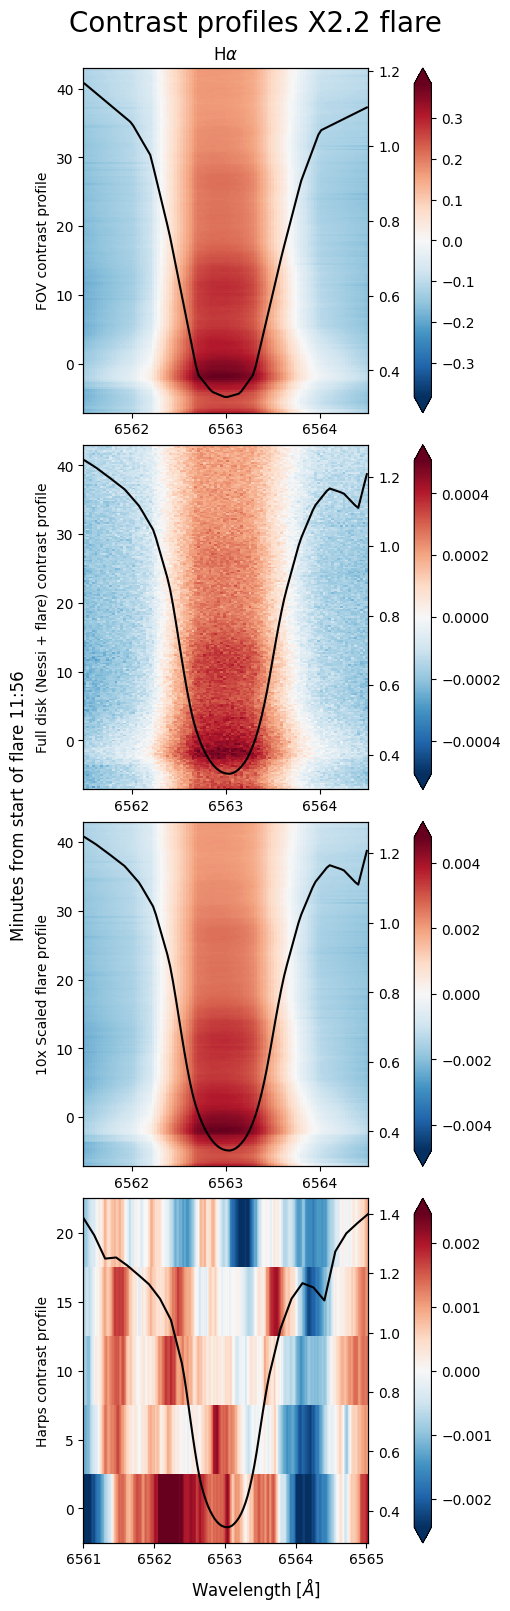

In [20]:
reload(un2)
lines = ["Ha17_9u"]
qs_sub = [True]
long_names = {"Ha17_9u":r"H$\alpha$ "}

un2.Create_flare_contrast_plots(lines, data, qs_sub, long_names, Harps=True, scale_up=True, 
                            title='Contrast profiles X2.2 flare', start_of_flare="11:56")

# the C1.3 flare 2013

In [21]:
# filename = 'FOV_spectrum_Ha13.npy'
# print(f"{filename = }")
# full_path = "D:\solar flares\data\\2013-06-30"
# filename = os.path.join('FOV', filename)
# print(f"{filename = }")
# filename = os.path.join(full_path, filename)
# print(f"{filename = }")

dict_keys(['FOV_Ha13', 'quiet_sun_Ha13', 'nessi_Ha13', 'TIME_Ha13'])
FOV: Line Ha13
FD: Line Ha13 None
scaled flare: Line Ha13 None


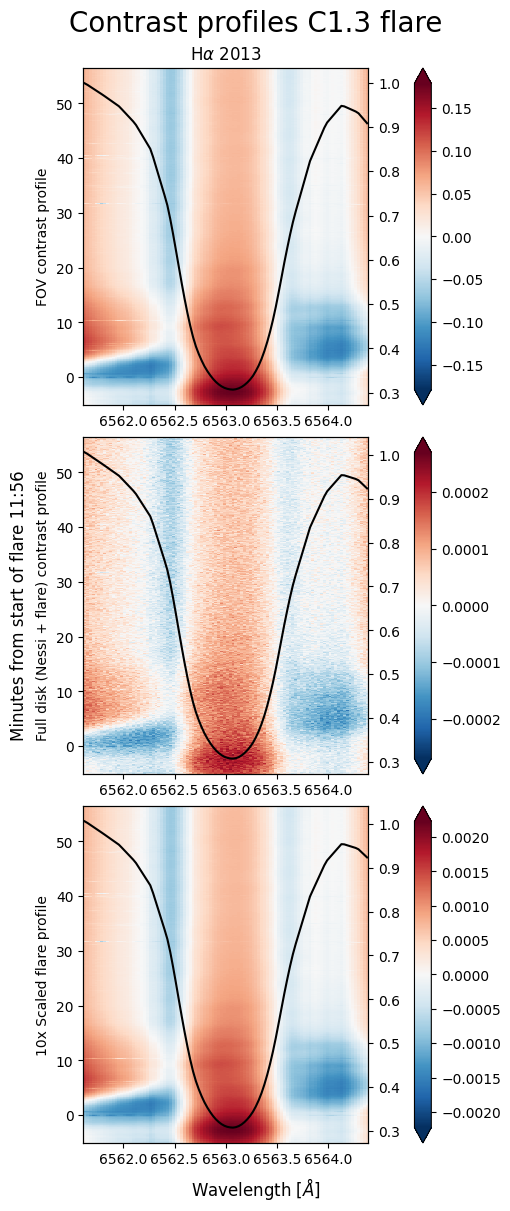

In [22]:
reload(un)
lines = ["Ha13"]
long_names = {"Ha13":r"H$\alpha$ 2013"}

data = un.load_for_further_analysis(lines, full_path = "D:\solar flares\data\\2013-06-30")
print(data.keys())
reload(un2)
qs_sub = [False]

un2.Create_flare_contrast_plots(lines, data, qs_sub, long_names, Harps=False, scale_up=True, 
                            title='Contrast profiles C1.3 flare', start_of_flare="11:56", normal=True)

# C2.2 flare 2019

In [23]:
reload(un)
lines = ["CaIR19", "Fe6173_2019", "CaK19"]
qs_sub = [False, False, False]
long_names = {"Fe6173_2019":r"Fe 6173", "CaK19":r'Ca$IIK$', "CaIR19":r'Ca$II 8542 \AA$'}


data = un.load_for_further_analysis(lines, full_path = "D:\solar flares\data\\2019-05-06")
un2.disgard_cont_point("CaK19", data)

print(data.keys())


dict_keys(['FOV_CaIR19', 'quiet_sun_CaIR19', 'nessi_CaIR19', 'TIME_CaIR19', 'FOV_Fe6173_2019', 'quiet_sun_Fe6173_2019', 'nessi_Fe6173_2019', 'TIME_Fe6173_2019', 'FOV_CaK19', 'quiet_sun_CaK19', 'nessi_CaK19', 'TIME_CaK19'])


In [24]:
data[f"quiet_sun_Fe6173_2019"]

array([[6.17272500e+03, 6.17277500e+03, 6.17282500e+03, 6.17286000e+03,
        6.17289500e+03, 6.17293000e+03, 6.17296500e+03, 6.17300000e+03,
        6.17303500e+03, 6.17307000e+03, 6.17310500e+03, 6.17314000e+03,
        6.17317500e+03, 6.17322500e+03, 6.17327500e+03],
       [2.13368094e-05, 2.11002953e-05, 2.03657182e-05, 1.90327428e-05,
        1.66794725e-05, 1.41607534e-05, 1.31000343e-05, 1.39206441e-05,
        1.62160086e-05, 1.86437392e-05, 1.99248352e-05, 2.05774686e-05,
        2.09438585e-05, 2.11580536e-05, 2.13208641e-05],
       [4.33188789e-02, 4.02642675e-02, 3.84231359e-02, 3.85478102e-02,
        4.40028980e-02, 4.02271785e-02, 3.90667431e-02, 5.95348477e-02,
        7.05254823e-02, 6.25783429e-02, 5.42725325e-02, 4.84038331e-02,
        4.85476255e-02, 4.62730788e-02, 4.65146042e-02]])

FOV: Line CaIR19
FOV: Line Fe6173_2019
FOV: Line CaK19
FD: Line CaIR19 None
FD: Line Fe6173_2019 0.0006
FD: Line CaK19 None
scaled flare: Line CaIR19 None
scaled flare: Line Fe6173_2019 0.0006
scaled flare: Line CaK19 None


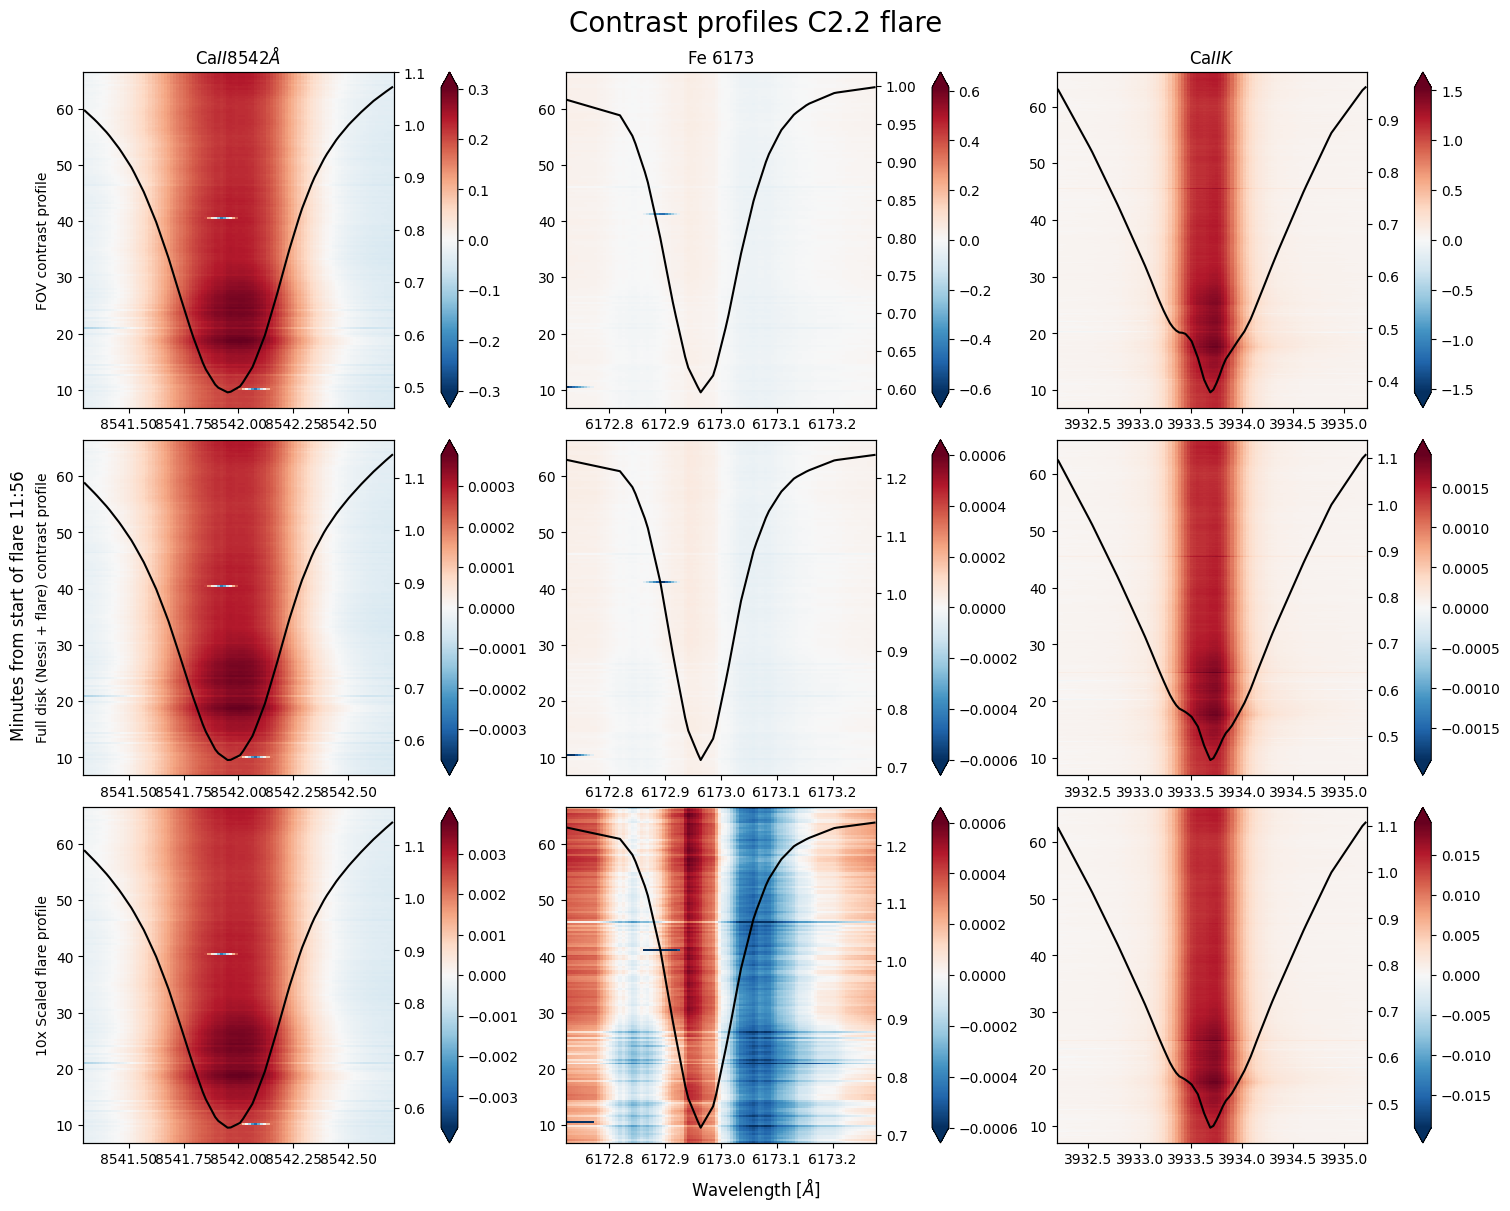

In [25]:
reload(un2)
long_names = {"Fe6173_2019":r"Fe 6173", "CaK19":r'Ca$IIK$', "CaIR19":r'Ca$II 8542 \AA$'}

vlims = {"Fe6173_2019":0.0006, "CaK19":None, "CaIR19":None} 

un2.Create_flare_contrast_plots(lines, data, qs_sub, long_names, Harps=False, scale_up=True, 
                            title='Contrast profiles C2.2 flare', start_of_flare="11:56", normal=True, vlims=vlims, add_noise=False)



# All plot of X9.3

In [33]:
reload(un)

<module 'use_nessi' from 'D:\\solar flares/data/2017-09-06\\use_nessi.py'>

scaled flare: Line Ha17
scaled flare: Line CaK17
scaled flare: Line CaII17


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_5388\1612645119.py:70: DeprecationWarning: The 'even' keyword is deprecated as of SciPy 1.11.0 and will be removed in SciPy 1.13.0
  DEW.append( scipy.integrate.simpson(y=restx(DFD[frame]), x=x, dx=1.0, axis=-1, even='avg'))


name = 'Ha17', for DEW = <function DEW at 0x0000020116E73C40>
name = 'CaK17', for DEW = <function DEW at 0x0000020116E73C40>
name = 'CaII17', for DEW = <function DEW at 0x0000020116E73C40>


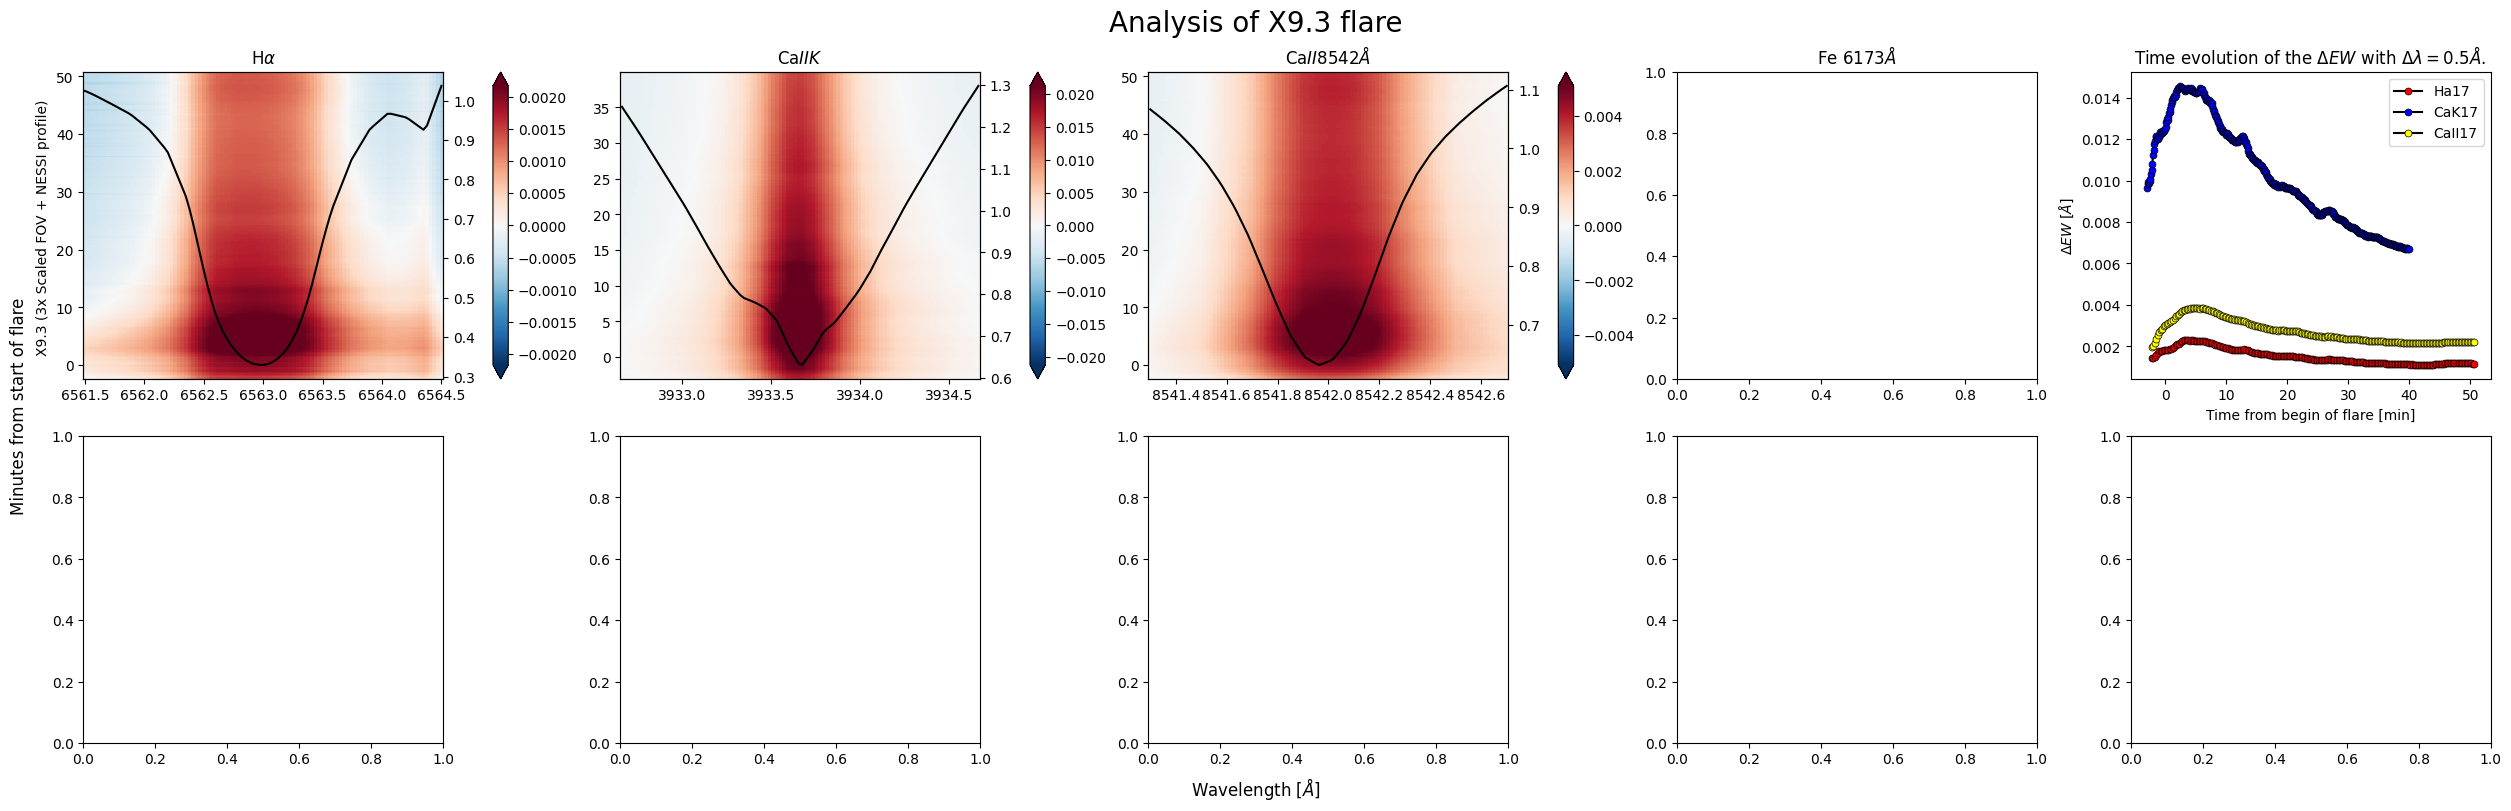

In [37]:
import scipy
def get_data(lines):
    full_path = un.full_path(lines)
    data = un.load_for_further_analysis(lines, full_path)
    for line in lines:
        if "CaK" in line:
            un2.disgard_cont_point(line, data)
    
    return data 

def index_match(lines, name):
    for i, line in enumerate(lines):
        if line in name:
            return i
    raise IndexError(f'No line in lines (={lines}) matches {name}. ')
    
def row_scaled_flares(fig, ax, names_of_lines_list, list_of_lines, scalefactor, name_of_flare=''):
    data = get_data(names_of_lines_list)
    for name in names_of_lines_list:
        i = index_match(list_of_lines, name)
        wav, DFD , time, line, std = un2.contrast_FD_data(name,data, quiet_sun_subtraction=False, area_factor=area_factor*scalefactor, normal=True, add_noise=False)
        W, T = np.meshgrid(wav, time)
        print("scaled flare: Line", name)
        # if 'Fe' in name:
        vlim = max(-np.percentile(DFD, 3), np.percentile(DFD, 97))
        # else:
            # vlim = None
        un2.ax_contrastplot(fig, ax[i], W, T, DFD, wav, line, decorations={}, seperate_colorbar=True, vlim=vlim)
        ax[i].set_visible(True)
        
    plot_DEW(ax[len(list_of_lines)], data, names_of_lines_list, scalefactor)
    ax[-1].set_visible(True)
    
    ax[0].set_ylabel(f"{name_of_flare} ({scalefactor}x Scaled FOV + NESSI profile) ")
    
def color_for_name(name):
    colors = {'Ha':'red', 'CaK':'blue', 'CaI':"yellow", "Fe":"darkgreen"}
    for line in colors.keys():
        if line in name:
            return colors[line]
    raise ValueError(f'The given name {name} is not linked to a color yet.')

def plot_DEW(ax, data, names, scalefactor):
    for name in names:
        dew, time = DEW(data, name, scalefactor)
        print(f'{name = }, for {DEW = }')
        ax.plot(time, dew, '-o', color='black', markerfacecolor=color_for_name(name), markeredgewidth=0.5, markersize=5, label=f'{name}')
    ax.set_title(r'Time evolution of the $\Delta EW $ with $\Delta \lambda = 0.5 \AA$. ')
    ax.set_xlabel('Time from begin of flare [min]')
    ax.set_ylabel(r'$\Delta EW$ $[\AA]$')
    ax.legend()

def DEW(data, name, scalefactor=1, Dlambda=0.5):
    sr = 959.63
    area_factor= 60**2/np.pi/sr**2*scalefactor
    
    wav, DFD , time, line, std = un2.contrast_FD_data(name,data, quiet_sun_subtraction=False, area_factor=area_factor, normal=True, add_noise=False)

    line_center = wav[np.where(line == np.min(line))[0][0]]
    interval = [line_center-Dlambda, line_center+Dlambda]
    
    DEW = []

    for frame in range(np.shape(time)[0]):
        

        x, restx = un.restrict_intervalx2(interval, wav)
        # print(np.shape(x), np.shape(restx(DFD)), x, DFD[frame] )

        DEW.append( scipy.integrate.simpson(y=restx(DFD[frame]), x=x, dx=1.0, axis=-1, even='avg'))

    return DEW, time




# rows: the different flares
rows = 2
# collumns: the differnt lines + DEW
cols = 5
title = "Analysis of X9.3 flare"

# make figure
fig, ax = plt.subplots(rows, cols, figsize=(5*cols,4*rows), constrained_layout=True)
fig.suptitle(title, fontsize=20)
fig.supylabel(f"Minutes from start of flare")
fig.supxlabel(r"Wavelength [$\AA$]")

# # Make all subplots invisible initially
# for a in ax.flat:
#   a.set_visible(False)

# lines
lines = ["Ha", "CaK", "CaI", "Fe"]
long_names = [r"H$\alpha$", r'Ca$IIK$', r'Ca$II 8542 \AA$', r'Fe $6173 \AA$']

for i in range(len(lines)):
    ax[0,i].set_title(long_names[i])

# row 1: Scaled contrast profiles + equivalent widths
names = ["Ha17", "CaK17", "CaII17"]
# long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}
scalefactor = 3
row_scaled_flares(fig, ax[0], names, lines, scalefactor, name_of_flare='X9.3')

# row 2: Voight residues and Mu plot


# # fig.savefig(f'D:\solar flares\data\plots\{title}.png')

# # rows: the different flares
# rows = 2
# # collumns: the differnt lines + DEW
# cols = 5
# title = "Analysis of X9.3 flare"

# # make figure
# fig, ax = plt.subplots(rows, cols, figsize=(5*cols,4*rows), constrained_layout=True)
# fig.suptitle(title, fontsize=20)
# fig.supylabel(f"Minutes from start of flare")
# fig.supxlabel(r"Wavelength [$\AA$]")

# # # Make all subplots invisible initially
# # for a in ax.flat:
# #   a.set_visible(False)

# # lines
# lines = ["Ha", "CaK", "CaI", "Fe"]
# long_names = [r"H$\alpha$", r'Ca$IIK$', r'Ca$II 8542 \AA$', r'Fe $6173 \AA$']

# for i in range(len(lines)):
#     ax[0,i].set_title(long_names[i])

# # row 1: Scaled contrast profiles + equivalent widths
# names = ["Ha17", "CaK17", "CaII17"]
# # long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}
# scalefactor = 3
# row_scaled_flares(fig, ax[0], names, lines, scalefactor, name_of_flare='X9.3')

# # row 2: Voight residues and Mu plot


# fig.savefig(f'D:\solar flares\data\plots\{title}.png')



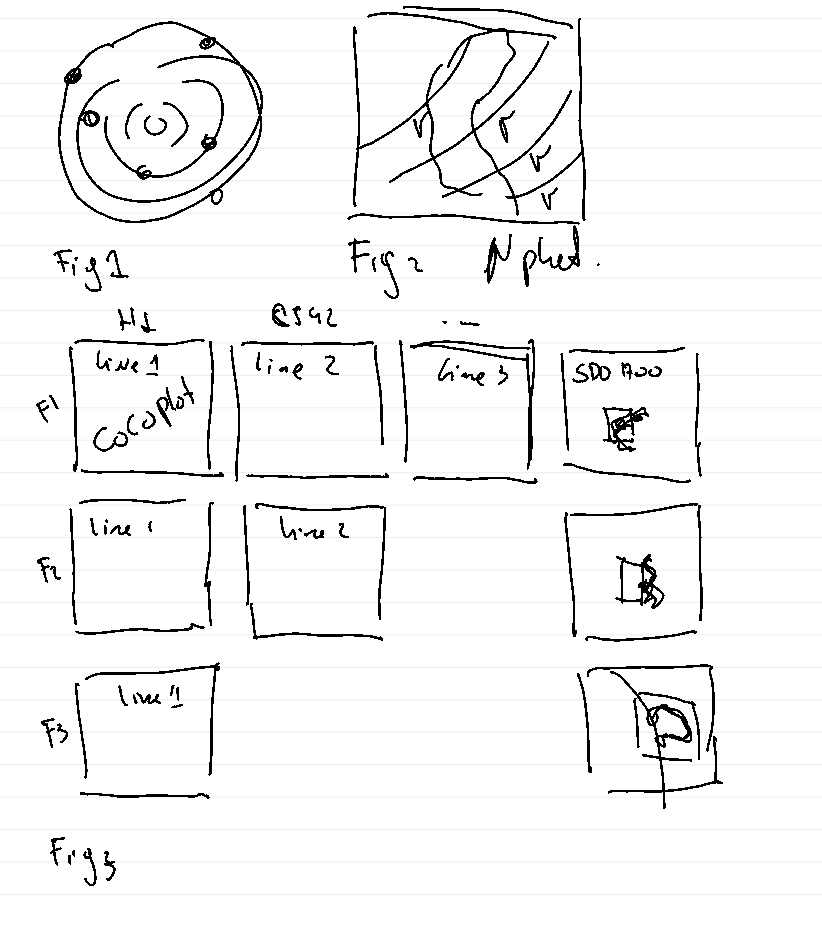

scaled flare: Line Ha17
scaled flare: Line CaK17
scaled flare: Line CaII17


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_5388\1268435538.py:55: DeprecationWarning: The 'even' keyword is deprecated as of SciPy 1.11.0 and will be removed in SciPy 1.13.0
  DEW.append( scipy.integrate.simpson(y=restx(DFD[frame]), x=x, dx=1.0, axis=-1, even='avg'))


name = 'Ha17', for DEW = <function DEW at 0x0000020116E73F60>
name = 'CaK17', for DEW = <function DEW at 0x0000020116E73F60>
name = 'CaII17', for DEW = <function DEW at 0x0000020116E73F60>
scaled flare: Line Ha17_9u
name = 'Ha17_9u', for DEW = <function DEW at 0x0000020116E73F60>
scaled flare: Line CaK19
scaled flare: Line CaIR19
scaled flare: Line Fe6173_2019
name = 'CaK19', for DEW = <function DEW at 0x0000020116E73F60>
name = 'CaIR19', for DEW = <function DEW at 0x0000020116E73F60>
name = 'Fe6173_2019', for DEW = <function DEW at 0x0000020116E73F60>
scaled flare: Line Ha13
name = 'Ha13', for DEW = <function DEW at 0x0000020116E73F60>


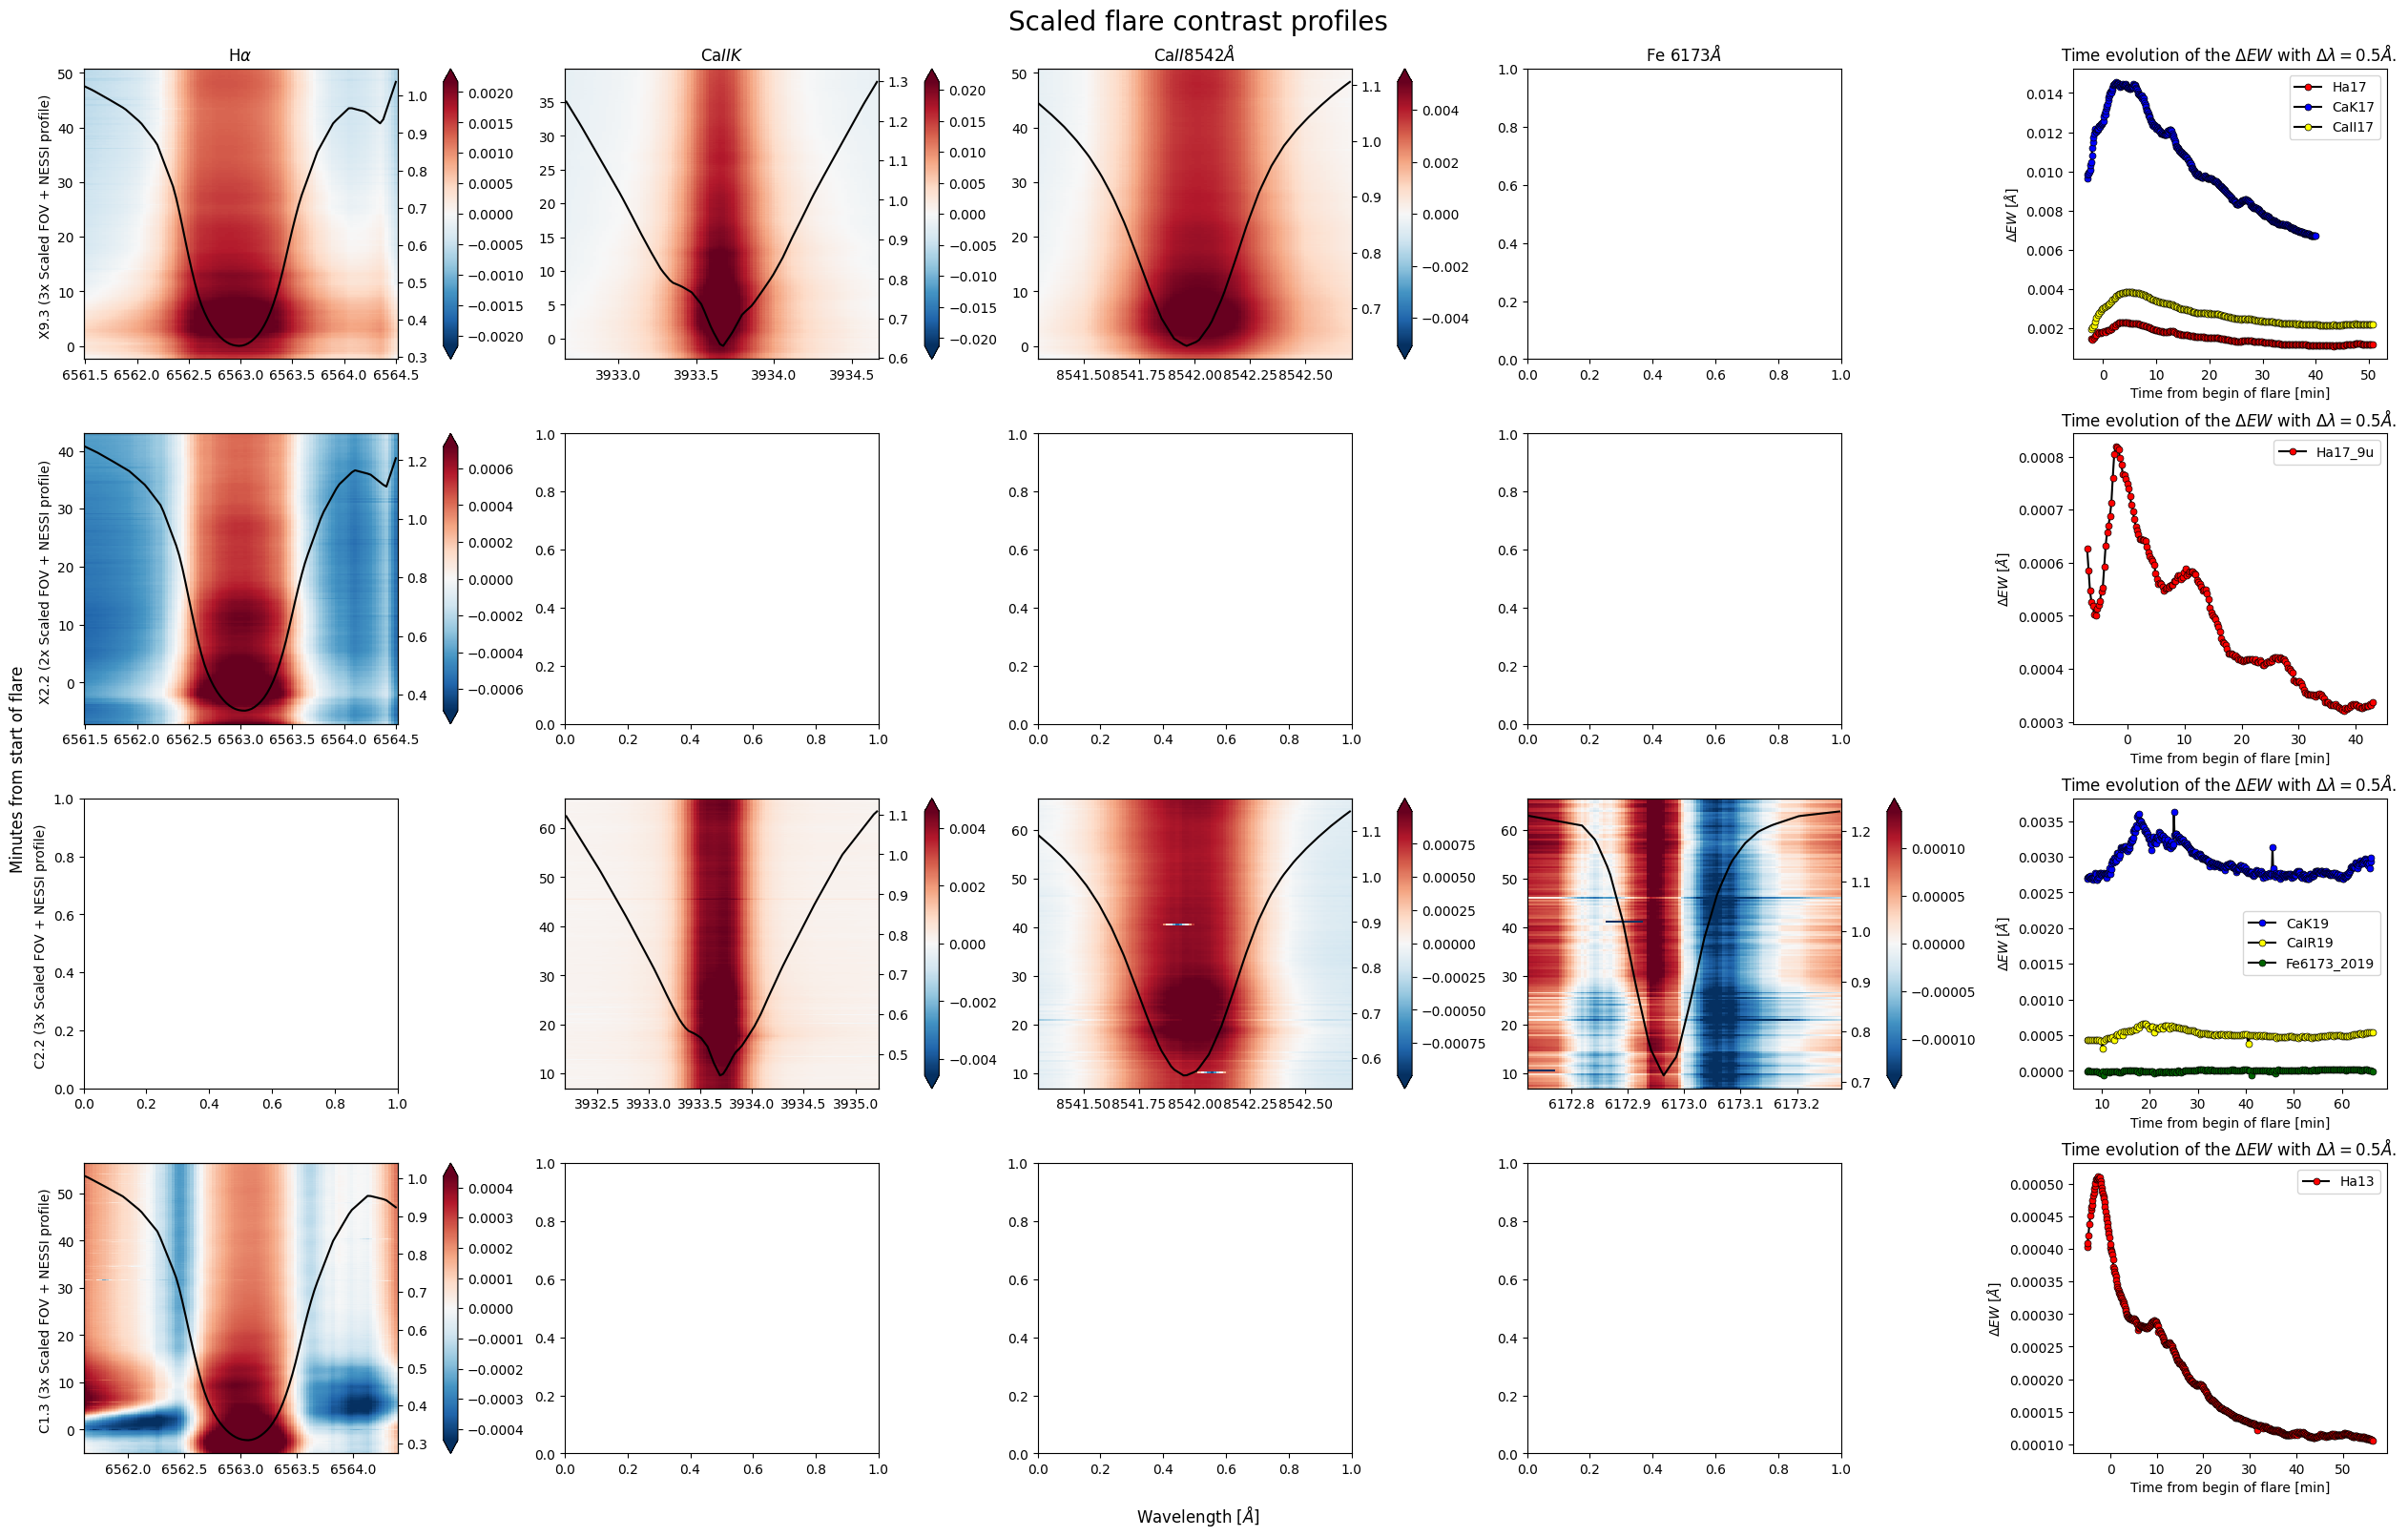

In [38]:
import scipy
def row_scaled_flares(fig, ax, names_of_lines_list, list_of_lines, scalefactor, name_of_flare=''):
    data = get_data(names_of_lines_list)
    for name in names_of_lines_list:
        i = index_match(list_of_lines, name)
        wav, DFD , time, line, std = un2.contrast_FD_data(name,data, quiet_sun_subtraction=False, area_factor=area_factor*scalefactor, normal=True, add_noise=False)
        W, T = np.meshgrid(wav, time)
        print("scaled flare: Line", name)
        # if 'Fe' in name:
        vlim = max(-np.percentile(DFD, 3), np.percentile(DFD, 97))
        # else:
            # vlim = None
        un2.ax_contrastplot(fig, ax[i], W, T, DFD, wav, line, decorations={}, seperate_colorbar=True, vlim=vlim)
        ax[i].set_visible(True)
        
    plot_DEW(ax[len(list_of_lines)], data, names_of_lines_list, scalefactor)
    ax[-1].set_visible(True)
    
    ax[0].set_ylabel(f"{name_of_flare} ({scalefactor}x Scaled FOV + NESSI profile) ")
    
def color_for_name(name):
    colors = {'Ha':'red', 'CaK':'blue', 'CaI':"yellow", "Fe":"darkgreen"}
    for line in colors.keys():
        if line in name:
            return colors[line]
    raise ValueError(f'The given name {name} is not linked to a color yet.')

def plot_DEW(ax, data, names, scalefactor):
    for name in names:
        dew, time = DEW(data, name, scalefactor)
        print(f'{name = }, for {DEW = }')
        ax.plot(time, dew, '-o', color='black', markerfacecolor=color_for_name(name), markeredgewidth=0.5, markersize=5, label=f'{name}')
    ax.set_title(r'Time evolution of the $\Delta EW $ with $\Delta \lambda = 0.5 \AA$. ')
    ax.set_xlabel('Time from begin of flare [min]')
    ax.set_ylabel(r'$\Delta EW$ $[\AA]$')
    ax.legend()

def DEW(data, name, scalefactor=1, Dlambda=0.5):
    sr = 959.63
    area_factor= 60**2/np.pi/sr**2*scalefactor
    
    wav, DFD , time, line, std = un2.contrast_FD_data(name,data, quiet_sun_subtraction=False, area_factor=area_factor, normal=True, add_noise=False)

    line_center = wav[np.where(line == np.min(line))[0][0]]
    interval = [line_center-Dlambda, line_center+Dlambda]
    
    DEW = []

    for frame in range(np.shape(time)[0]):
        

        x, restx = un.restrict_intervalx2(interval, wav)
        # print(np.shape(x), np.shape(restx(DFD)), x, DFD[frame] )

        DEW.append( scipy.integrate.simpson(y=restx(DFD[frame]), x=x, dx=1.0, axis=-1, even='avg'))

    return DEW, time



# def differenced_equivalent_width(self, f_nessi_theta, f_nessi_clv_theta, wav, Dlambda):

#     line_center = wav[np.where(f_nessi_theta(wav) == np.min(f_nessi_theta(wav)))[0][0]]
#     interval = [line_center-Dlambda, line_center+Dlambda]

#     DEW = []

#     for frame in range(self._number_of_frames):
#         DS = areafactor * (interp1d(self._wavel, self.FOV_spectrum[frame])(wav) - f_nessi_clv_theta(wav))

#         x, restx = un.restrict_intervalx2(interval, wav)

#         DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))

#     return DEW

# def scaled_flares_contrast_plots(names_of_lines_list, data, quiet_sun_subtraction_list, long_names, Harps=False, 
#                                 scale_up=False, title='Contrast profiles', start_of_flare='', shared_colors_row=False, normal=True, vlims=None, add_noise=True, scale=10):

# rows: the different flares
rows = 4
# collumns: the differnt lines + DEW
cols = 5
title = "Scaled flare contrast profiles"

# make figure
fig, ax = plt.subplots(rows, cols, figsize=(5*cols,4*rows), constrained_layout=True)
fig.suptitle(title, fontsize=20)
fig.supylabel(f"Minutes from start of flare")
fig.supxlabel(r"Wavelength [$\AA$]")

# # Make all subplots invisible initially
# for a in ax.flat:
#   a.set_visible(False)

# lines
lines = ["Ha", "CaK", "CaI", "Fe"]
long_names = [r"H$\alpha$", r'Ca$IIK$', r'Ca$II 8542 \AA$', r'Fe $6173 \AA$']

for i in range(len(lines)):
    ax[0,i].set_title(long_names[i])

# row 1: X9.3 flare
names = ["Ha17", "CaK17", "CaII17"]
# long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}
scalefactor = 3
row_scaled_flares(fig, ax[0], names, lines, scalefactor, name_of_flare='X9.3')

# row 2: X2.2 flare
names = ["Ha17_9u"]
scalefactor = 2
row_scaled_flares(fig, ax[1], names, lines, scalefactor, name_of_flare='X2.2')

# row 3: C2.2 flare
names = ["CaK19", "CaIR19", "Fe6173_2019"]
# long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}
scalefactor = 3
row_scaled_flares(fig, ax[2], names, lines, scalefactor, name_of_flare='C2.2')

# row 4: C1.3 flarenames = ["Ha17", "CaK17", "CaII17"]
names = ['Ha13']
# long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}
scalefactor = 3
row_scaled_flares(fig, ax[3], names, lines, scalefactor, name_of_flare='C1.3')


figname="scaled_flares_contrast_plot"
fig.savefig(f'D:\solar flares\data\plots\{figname}.png')



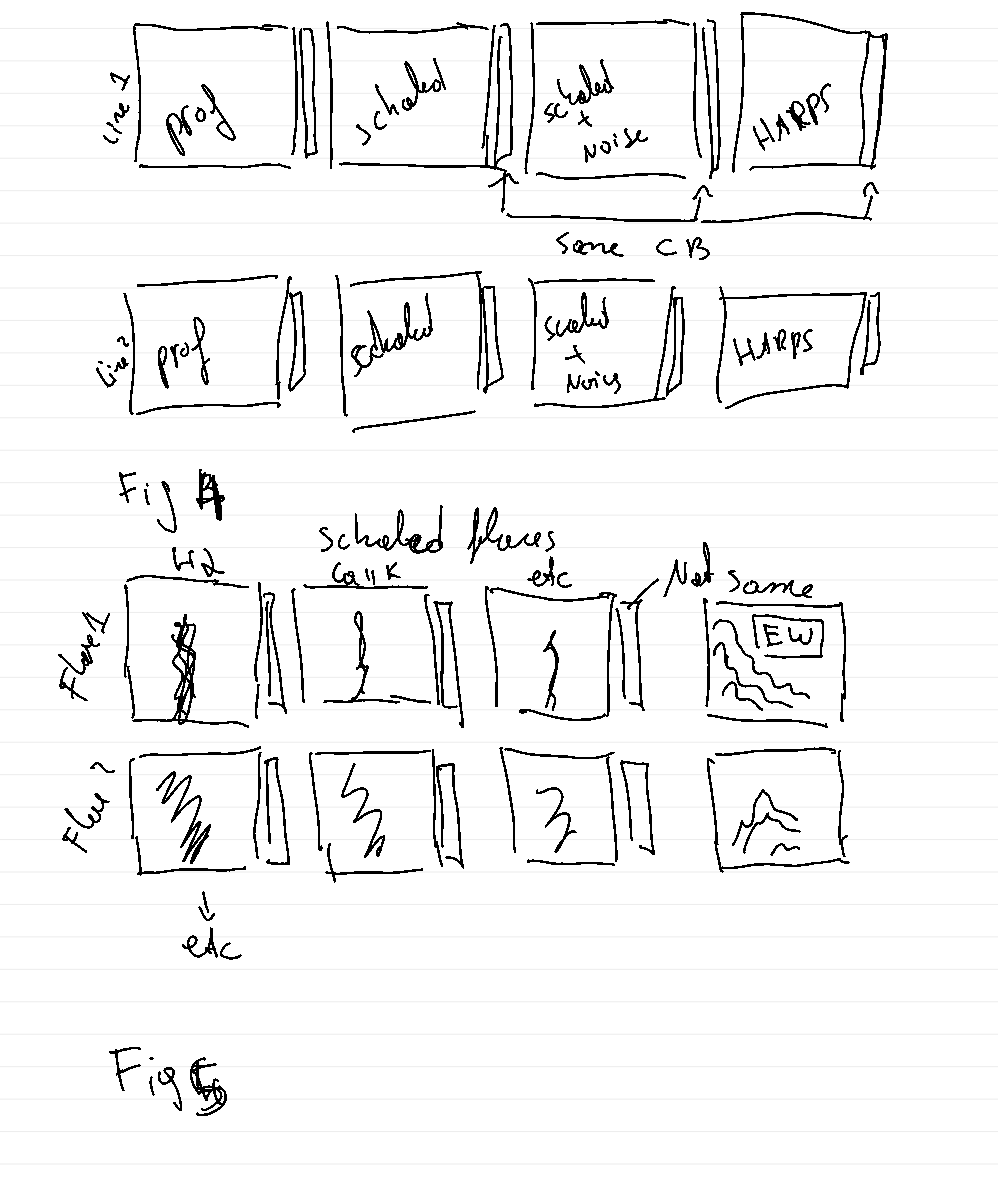

In [5]:

def Harps_contrast_plots(names_of_lines_list, data, quiet_sun_subtraction_list, long_names, sst_part=True,
                                title='Contrast profiles', start_of_flare='', shared_colors_row=False, normal=True, vlims=None, 
                                add_noise=True, scale=10):
    
    cols = 4
    rows = len(names_of_lines_list)

    # make figure
    fig, ax = plt.subplots(rows, cols, figsize=(5*cols,4*rows), constrained_layout=True)
    fig.suptitle(title, fontsize=20)
    fig.supylabel(f"Minutes from start of flare {start_of_flare}")
    fig.supxlabel(r"Wavelength [$\AA$]")
    
    time_lim = []
    
    # col 4: Harps data
    un2.acx_coord(ax, 0, 3).set_title("Harps contrast profile")
    for i, name in enumerate(names_of_lines_list):
        
        flare_win, wav_win, time = un2.get_Harps(name)
        if flare_win is not None:
            wav_nessi, dc_nessi, clv_nessi = data[f"nessi_{name}"]
            if "CaK" in name:
                wav_nessi, dc_nessi = wav_nessi[:-1], dc_nessi[:-1]
            W, T = np.meshgrid(wav_win, time)

            decorations={}
            vlim = vlims[name] if vlims is not None else None
            print("Harps: Line", name, vlim)
            un2.ax_contrastplot(fig, un2.acx_coord(ax, i, 3), W, T, flare_win, wav_nessi, dc_nessi, decorations , vlimscale=2/3,
                            seperate_colorbar=True, xlim=(wav_nessi[0], wav_nessi[-1]), vlim=vlim)
        time_lim.append((time[0], time[-1]))

    # col 1: sst FOV contrastplots
    ax[0,0].set_title("FOV contrast profile")
    for i, name in enumerate(names_of_lines_list):
        ax[i,0].set_ylabel(long_names[name], size=15)
        print("FOV: Line", name)
        wav, DFOV , time, line, std = un2.contrast_FOV_data(name, data, quiet_sun_subtraction_list[i], normal=normal)
        W, T = np.meshgrid(wav, time)

        decorations={}

        un2.ax_contrastplot(fig, un2.acx_coord(ax, i, 0), W, T, DFOV, wav, line, decorations , seperate_colorbar=True, logscale=False)
        if sst_part:
            time_lim[i] = (time[0], time[-1])

        
    # col 2 : scaled up flare
    ax[0,1].set_title(f"Full disk contrast profile ({scale}x scaled FOV + NESSI)")
    for i, name in enumerate(names_of_lines_list):
        scalefactor = scale
        wav, DFD , time, line, std = un2.contrast_FD_data(name,data, quiet_sun_subtraction_list[i], area_factor=area_factor*scalefactor, normal=normal, add_noise=False)
        W, T = np.meshgrid(wav, time)

        decorations={}
        if i==0:
            decorations["ylabel"] = f"{scalefactor}x Scaled flare profile"
        vlim = vlims[name] if vlims is not None else None
        print("scaled flare: Line", name, vlim)
        un2.ax_contrastplot(fig, un2.acx_coord(ax, i, 1), W, T, DFD, wav, line, decorations, seperate_colorbar=True, vlim=vlim)
        
    # col 3 : scaled up flare + noise as in Harps
    ax[0,2].set_title(f"Full disk contrast profile ({scale}x scaled FOV + NESSI)\n degraded in time + Harpslike noise.")
    for i, name in enumerate(names_of_lines_list):
        
        wav, DFD , time, line, std = un2.degenerate_contrast_as_Harps(name, data, quiet_sun_subtraction_list[i], area_factor*scalefactor,normal=normal, add_noise=True)

        W, T = np.meshgrid(wav, time)

        vlim = vlims[name] if vlims is not None else None
        print("scaled flare: Line", name, vlim)
        un2.ax_contrastplot(fig, un2.acx_coord(ax, i, 2), W, T, DFD, wav, line, decorations={}, seperate_colorbar=True, vlim=vlim)
        
    for i in range(2):
        for j in range(4):
            ax[i, j].set_ylim(time_lim[i])


    # plt.tight_layout()
    plt.show()
            

    figname="contrastplot_Harps"
    fig.savefig(f'D:\solar flares\data\plots\{figname}.png')
  


Harps: Line Ha17 None
Harps: Line CaK17 None
FOV: Line Ha17
FOV: Line CaK17
scaled flare: Line Ha17 None
scaled flare: Line CaK17 None
scaled flare: Line Ha17 None
scaled flare: Line CaK17 None


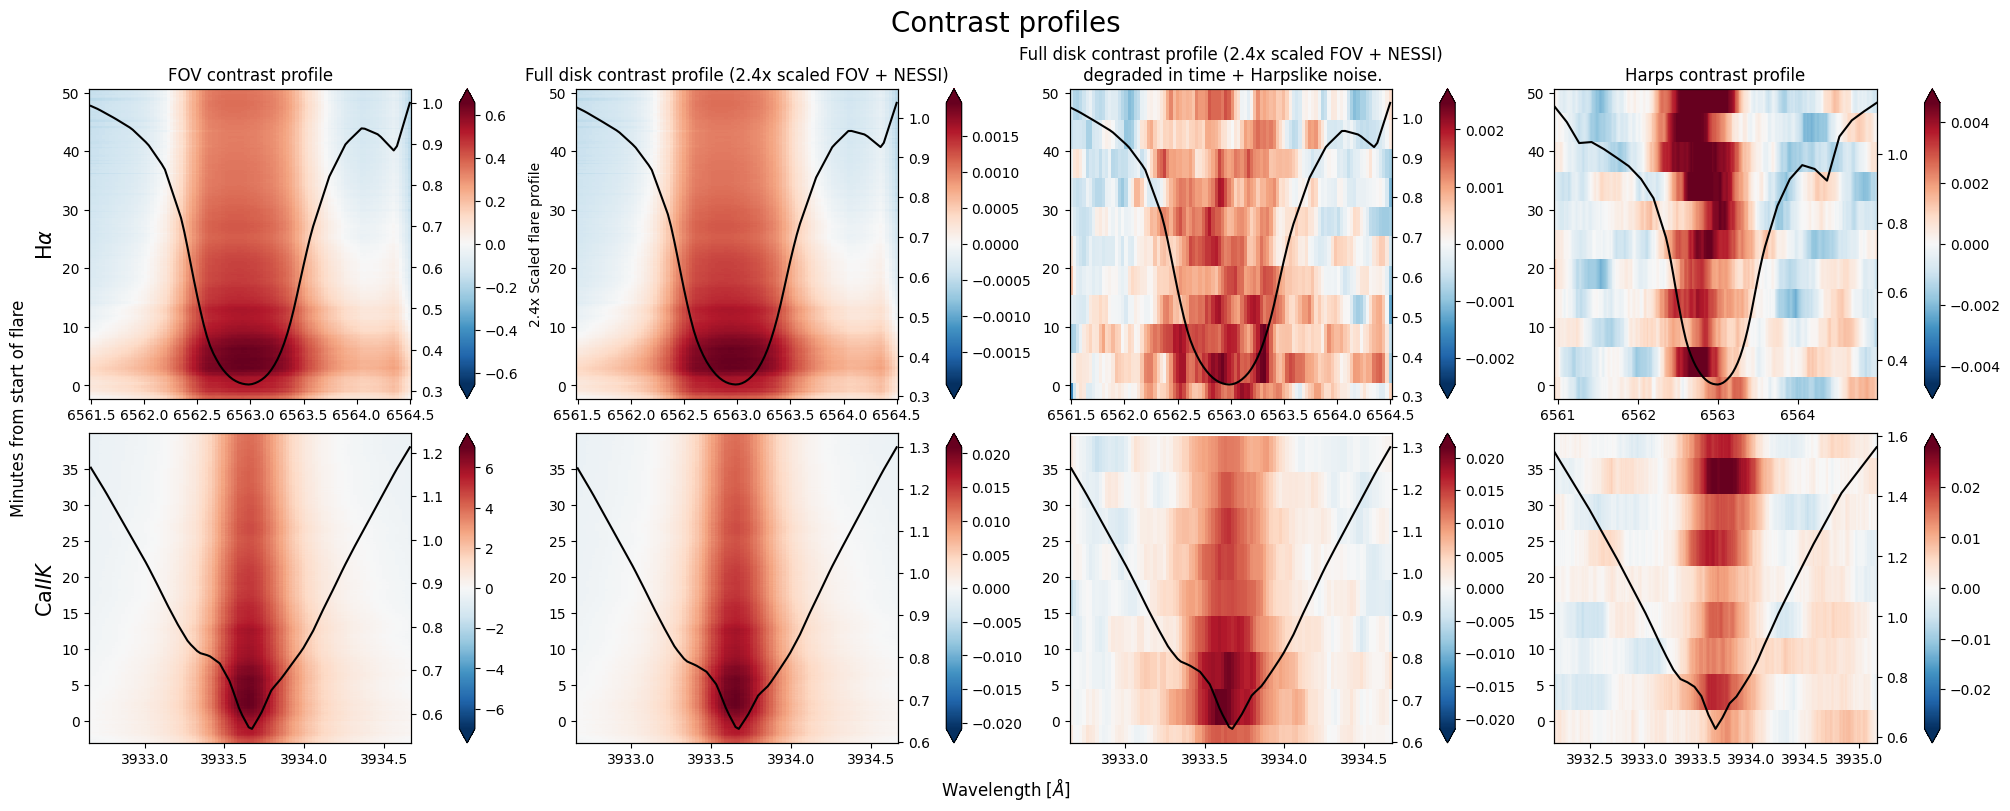

Harps: Line Ha17 None
Harps: Line CaK17 None
FOV: Line Ha17
FOV: Line CaK17
scaled flare: Line Ha17 None
scaled flare: Line CaK17 None
scaled flare: Line Ha17 None
scaled flare: Line CaK17 None


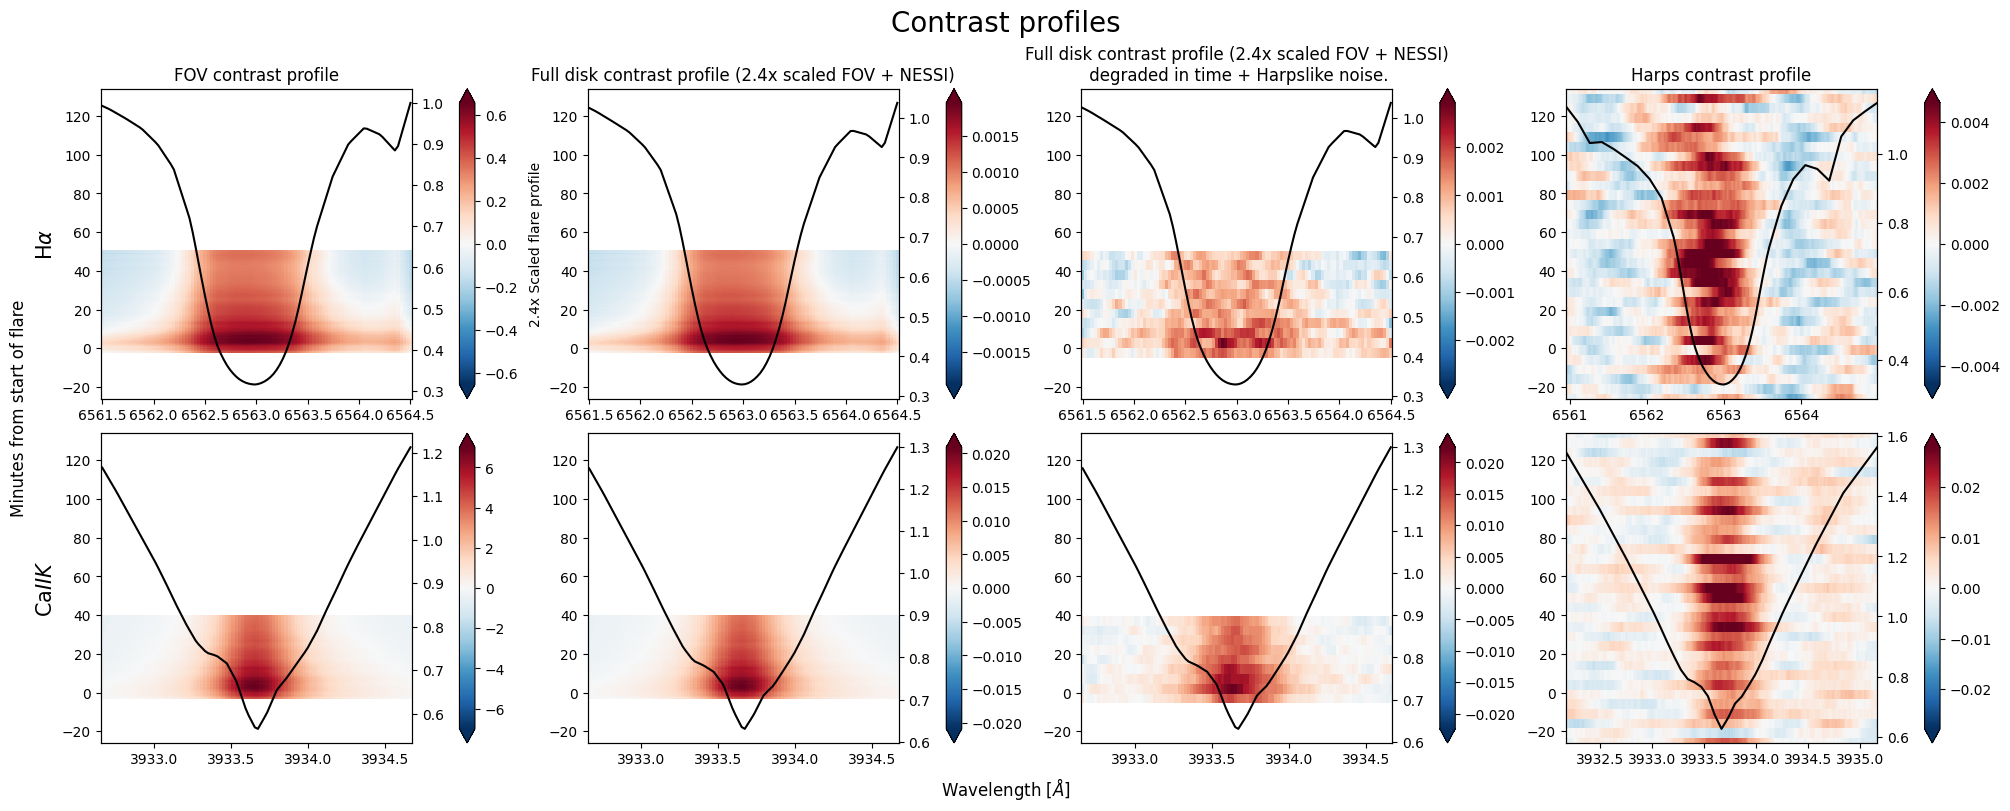

In [6]:
reload(un2)
lines = ["Ha17", "CaK17"]
long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}


data = un.load_for_further_analysis(lines, full_path=un.full_path("17"))
un2.disgard_cont_point("CaK17", data)
qs_sub = [False, False, False]
# vlims = {"Ha17":0.006, "CaK17":0.04, "CaII17":0.01}


# un2.Create_flare_contrast_plots(lines, data, qs_sub, long_names, Harps=True, scale_up=True, 
#                             title='Contrast profiles X9.3 flare', start_of_flare="11:56", add_noise=True, scale=3)
Harps_contrast_plots(lines, data, qs_sub, long_names, title='Contrast profiles', start_of_flare='', shared_colors_row=False, 
                     normal=True, vlims=None, add_noise=True, scale=2.4, sst_part=True)
Harps_contrast_plots(lines, data, qs_sub, long_names, title='Contrast profiles', start_of_flare='', shared_colors_row=False, 
                     normal=True, vlims=None, add_noise=True, scale=2.4, sst_part=False)

**Caption**: Procedure to obtain HARPS-like contrast profiles from FOV observations of SST for \Halpha (upper row) and \CaK (lower row). \textbf{1st column:} FOV contrast profiles obtained by integration over FOV and quiet sun subtraction. \textbf{2nd column:} Full disk contrast profiles by NESSI. \textbf{3th column:} Degenerate in time to match HARPS cadence (5 min) and HARPS-like noise added. This noise was standard normal distributed with standard deviation obtained from the wings of the HARPS spectra. \textbf{4th column:} The observed HARPS spectra for the \Halpha and \CaK (only two available lines) of the same event, the X9.3 flare. HARPS takes 1 pixel measurements, i.e. a true sun-as-a-star observer for comparison with the NESSI obtained result. 

**Explanation:** HARPS, [give specifications or refer to introduction] captured the X9.3 flare in the \Halpha and \CaK lines with a 5 minute cadence. In \autoref{} we simulated a HARPS observation of the X9.3 flare. We constructed virtual full disk spectrum from the SST observations for the event in the two lines and denegraded it in time to a 5 minute cadence. Thereafter we derived the standard deviation for noise in the HARPS spectra wings and added similar noise to the time degraded spectra. the virtual HARPS profile and the true HARPS profile are plotted next to each other for comparizon. Here it seems that are some fundamental diffenceses as the virtual profile decays after 5 minutes into the flare while the peads of the true profiles have there peak starting from 40 minutes. A probable cause for this phenomena is the partial capture of the flare by SST. The more intense regions later in the flare were indeed outside the FOV. However the general beheaviour agree for both lines though the linear scaling to account for the partial capture misses a significant part of the apparent phenomena. 


## Plotting the FOV over the solar surface

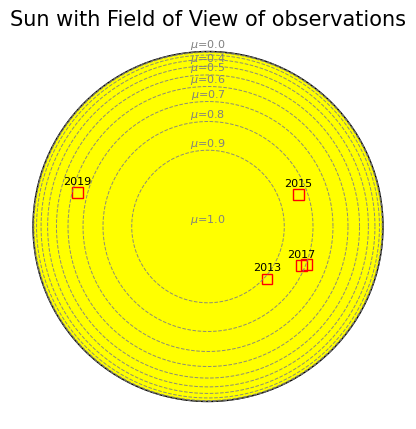

In [7]:

# import matplotlib.patches as patches

# # Function to plot rectangles representing the field of view
# def plot_fov(ax, x, y, width, height, color='red', label=''):
#     rect = patches.Rectangle((x - width / 2, y - height / 2), width, height,
#                              linewidth=1, edgecolor=color, facecolor='none', label=label)
#     ax.add_patch(rect)
#     ax.text(x, y+height, label, ha='center', va='center', fontsize=8)

# def plot_centrical_circ(ax, mu, x, y):
#     r = (1-mu**2)**0.5
#     theta = np.arange(0, 2*np.pi, 0.01)
#     circx = r*np.cos(theta) + x
#     circy = r*np.sin(theta) + y
#     ax.plot(circx, circy, linestyle='--', alpha=0.9, color='gray', linewidth=0.7)
#     if mu>=0.4 or mu==0:
#         ax.text(0, r, fr'$\mu$={mu:.1f}', ha='center', va='bottom', fontsize=8, color='gray')

# def plot_mu_grid(ax, mu):
#     for i in mu:
#         plot_centrical_circ(ax, i, 0, 0)

# # Function to create the sun plot
# def create_sun_plot(centers, flarelabels, z=60/959.63):
#     fig, ax = plt.subplots(figsize=(5,5))

#     # Plot the yellow disk for the sun
#     sun = plt.Circle((0, 0), 1, color='yellow', ec='black')
#     ax.add_patch(sun)

#     # Plot rectangles for the field of view at various locations
#     for i, center in enumerate(centers):
#         plot_fov(ax, x=center[0], y=center[1], width=z, height=z, label=flarelabels[i])

#     # plot mu grid
#     plot_mu_grid(ax, mu = np.arange(0, 1.05, 0.1))

#     # Customize the plot
#     ax.set_aspect('equal')  # Ensure aspect ratio is equal
#     ax.set_title('Sun with Field of View of observations', fontsize=15)
#     ax.axis('off')  # Hide the axes

#     plt.show()

sr = solar_radius = 959.63
centers = [(513/sr, -216/sr) , (542/sr, -208/sr), (-716.9/sr, 186.2/sr) ,(323.4/sr, -287.9/sr), (496/sr, 175/sr),  ]
flarelabels = ["2017", "", "2019", "2013", "2015", "2017b", ]

# Create the sun plot
un2.create_sun_plot(centers, flarelabels)


# Equivalent width

The frame integrated spectrum:
$$f(t,\lambda,A) = \int_A I(t,\lambda,\vec{x})d\vec{x}$$

weight against a continuum wavelength
$$F(t,\lambda,A) = \frac{f(t,\lambda,A)}{f(t,\lambda_\text{cont},A)} \times f(t_0,\lambda_\text{cont},A)$$

Target Region wieghted against a quiet region to find relative intensity
$$F_{TR}(t, \lambda) = \frac{F(t,\lambda,A = TR)}{F(t,\lambda,A = QR)} \times F(t_0,\lambda,A=QR)$$
This we do both with the scalar multiplication to find relative intensities

The difference in spectrum in time (we do spectrum - quiet sun)
$$\Delta F=  F_{TR}(t,\lambda) - F_{TR}(t_0,\lambda)$$

weighing it again against a reference intensity. (We incorporate this is the scalar weight)
$$\Delta S(t,\lambda) = \Delta F_{TR}(t,\lambda)/F(t_0,\lambda_\text{cont},A=\text{ full disk})$$

The equivalent width is defind as the integral over the resulting normalized pre-event-subtracted H$\alpha$ spectrum
$\Delta S(t, \lambda)$ represents the ratio of the spectral changes coming from
active events to the solar irradiance (full-disk continuum). 
$$ \Delta EW_{H\alpha \pm \Delta \lambda } = \int_{H\alpha - \Delta \lambda}^{H\alpha + \Delta \lambda} \Delta S(t,\lambda ) d\lambda $$ 


To obtain something analogous (or even maybe equivalent although only a function of the line center.) We could integrate over the difference of NESSI+sst - NESSI.








$$f(t,\lambda,A) = \int_A I(t,\lambda,\vec{x})d\vec{x}$$
$\Delta EW = \int_{\lambda }$

$I_{FOV}(t, \lambda) = \frac{1}{A_{FOV}}\int_{FOV} I(t,\lambda,\vec{x})d\vec{x}$
$I_{QR}(t, \lambda) = \frac{1}{A_{QR}}\int_{QR} I(t,\lambda,\vec{x})d\vec{x}$
$\Delta S(t,\lambda ) = \frac{I_{FOV}(t, \lambda) - I_{QR}(t, \lambda) }{I_{QR}(t_0, \lambda)}$

$$ \Delta EW_{H\alpha \pm \Delta \lambda } = \int_{H\alpha - \Delta \lambda}^{H\alpha + \Delta \lambda} \Delta S(t,\lambda ) d\lambda $$ 


In [ ]:
# import scipy

# def differenced_equivalent_width(sst_data, f_nessi_theta, f_nessi_clv_theta, wav, Dlambda):

#     line_center = wav[np.where(f_nessi_theta(wav) == np.min(f_nessi_theta(wav)))[0][0]]
#     interval = [line_center-Dlambda, line_center+Dlambda]

#     DEW = []

#     for frame in range(sst_data._number_of_frames):
#         DS = areafactor * (interp1d(CaK._wavel, CaK.FOV_spectrum[frame])(wav) - f_nessi_clv_theta(wav))

#         x, restx = un.restrict_intervalx2(interval, wav)

#         DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))

#     return DEW

# def plot_equivalent_width(sst_data, TIME, theor_line):
    
#     f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1]
#                                   , kind='linear', fill_value="extrapolate")
#     f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
#                                     , kind='linear', fill_value="extrapolate")

#     theta = sst_data.theta_nessi_to_quiet_sun
    
#     DEW = differenced_equivalent_width(sst_data = sst_data, f_nessi_theta = f_nessi(theta), f_nessi_clv_theta=f_nessi_clv(theta), wav=wav, Dlambda= 0.5)

#     fig = plt.figure()
#     ax1 = fig.add_axes((0,0,1,1))
#     ax1.plot(TIME, DEW, '-o', color='black', markerfacecolor='red', markeredgewidth=0.5, markersize=5, label=r'$\Delta EW$')
#     ax1.set_title(r'Time evolution of the $\Delta EW $ with $\Delta \lambda = 0.5 \AA$ for $H\alpha$ line. ')
#     ax1.set_xlabel('Time from 11:56:35 UT on [min]')
#     ax1.set_ylabel(r'$\Delta EW$ $[\AA]$')
#     # ax1.legend()
#     plt.show()
    
# TIME = sst_data.TIME
    
# plot_equivalent_width(sst_data, TIME, theor_line)

NameError: name 'sst_data' is not defined

for the CaK 2019 flare:
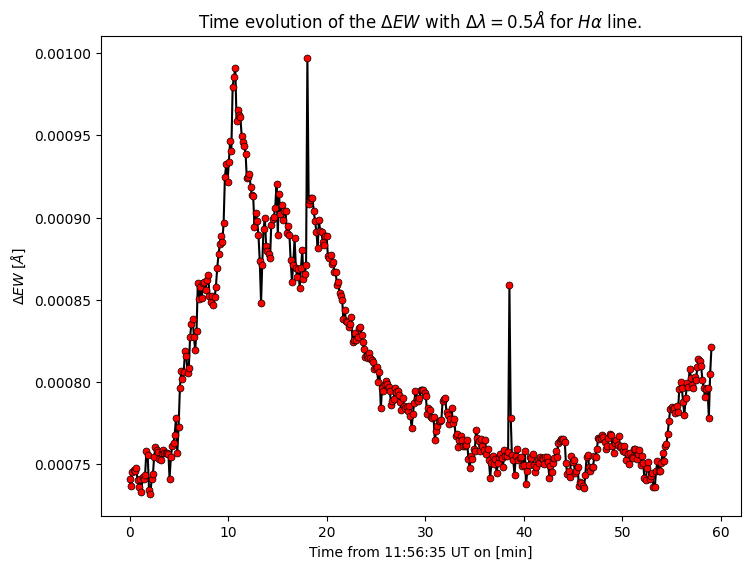